### Dependencies

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nltk as nlp
import scipy
nlp.download('averaged_perceptron_tagger')
nlp.download('punkt')
!pip install trunajod
!python -m spacy download en_core_web_sm
nlp.download('stopwords')
from nltk.corpus import stopwords
!pip install pca


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 2.6 MB/s eta 0:00:00
2023-08-10 14:41:47.047001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data loading & preprocessing

In [ ]:
df = pd.read_csv('merged_df(window size 0.04 approximately) (3).csv')
replacement_dict = {'Saccade': 0, 'Fixation': 1, 'Unclassified': 2, 'EyesNotFound': 3}

# Replace the values in the column
df['Eye movement type'] = df['Eye movement type'].replace(replacement_dict)

feature_names = ['Gaze event duration', 'Fixation point X',
       'Fixation point Y', 'Eye movement type', 'Accelerometer X',
       'Accelerometer Y', 'Accelerometer Z', 'Gyro X', 'Gyro Y', 'Gyro Z',
       'Gaze point X', 'Gaze point Y', 'Gaze point 3D X', 'Gaze point 3D Y',
       'Gaze point 3D Z', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil position left X', 'Pupil position left Y',
       'Pupil position left Z', 'Pupil position right X',
       'Pupil position right Y', 'Pupil position right Z',
       'Pupil diameter left', 'Pupil diameter right']
X = df[feature_names]
imputer = SimpleImputer()
X_filled = imputer.fit_transform(X)
X_filled = pd.DataFrame(X_filled, columns=feature_names)
X_filled['Time Window'] = df['Time Window']
X_filled['is_distraction'] = df['is_distraction']
X_filled['videoNum'] = df['videoNum']
X_filled['Participant ID'] = df['Participant ID']
X_filled['interest_level'] = df['interest_level']
X_filled = X_filled[X_filled['Time Window'].notna()]

## Parse Window Size Partitions
If the window is smaller than window size, include == True will keep all windows, include == False will exlude those smaller than window size; Taken from the "Window Preprocessing" part

In [ ]:
window_05s, window_05s_neg = parse_data(X_filled, 0.5, include=False)
# check_windows(window_05s)
window_1s, window_1s_neg = parse_data(X_filled, 1, include=False)
# check_windows(window_1s)
window_5s, window_5s_neg = parse_data(X_filled, 5, include=False)
window_3s, window_3s_neg = parse_data(X_filled, 3, include=False)
# check_windows(window_3s)
window_4s, window_4s_neg = parse_data(X_filled, 4, include=False)
# check_windows(window_4s)

2865 2923
2806 2515
978 432
1809 881
1328 597


### Look at gaze duration inside gaze partitions
gazeDurationList: We define gaze duration in each patition: max(continous 'Eye gaze type' == 'Fixation')

gazeDurationRatio: In this function, we only look at the ratio of fixations

In [ ]:
_ = gazeDurationListSingleStartTimePersonLevel(window_10s, 10, binwidth=0.03, title='Start Longest Gaze Before Utterance Distribution For Window Size 10s Personal Level')
_ = gazeDurationListSingleStartTimePersonLevel(window_5s, 5, binwidth=0.03, title='Start Longest Gaze Before Utterance Distribution For Window Size 5s Personal Level')

In [ ]:
_ = gazeDurationListSingleStartTime(window_10s, 10, binwidth=0.03, title='Start Longest Gaze Before Utterance Distribution For Window Size 10s')
_ = gazeDurationListSingleStartTime(window_5s, 5, binwidth=0.03, title='Start Longest Gaze Before Utterance Distribution For Window Size 5s')

In [ ]:
window_1s_gaze=gazeDurationListSingle(window_1s, 1, binwidth=0.03, title='Longest Gaze Duration Distribution For Window Size 1s')
window_2s_gaze=gazeDurationListSingle(window_2s, 2, binwidth=0.03, title='Longest Duration Distribution For Window Size 2s')
window_3s_gaze=gazeDurationListSingle(window_3s, 3, binwidth=0.03, title='Longest Duration Distribution For Window Size 3s')
window_4s_gaze=gazeDurationListSingle(window_4s, 4, binwidth=0.03, title='Longest Duration Distribution For Window Size 4s')
window_5s_gaze=gazeDurationListSingle(window_5s, 5, binwidth=0.03, title='Longest Duration Distribution For Window Size 5s')

In [ ]:
window_5s_gaze=gazeDurationList(window_10s, window_10s_neg,10, title='Gaze Duration Distribution For Window Size 10s')
window_5s_gaze=gazeDurationList(window_5s, window_5s_neg,5, title='Gaze Duration Distribution For Window Size 5s')


In [ ]:
window_5s_gaze=gazeDurationList(window_5s, window_5s_neg,5, title='Gaze Duration Distribution For Window Size 5s')
window_4s_gaze=gazeDurationList(window_4s, window_4s_neg,4, title='Gaze Duration Distribution For Window Size 4s')
window_3s_gaze=gazeDurationList(window_3s, window_3s_neg,3, title='Gaze Duration Distribution For Window Size 3s')
window_2s_gaze=gazeDurationList(window_2s, window_2s_neg,2, title='Gaze Duration Distribution For Window Size 2s')
window_1s_gaze=gazeDurationList(window_1s, window_1s_neg,1, title='Gaze Duration Distribution For Window Size 1s')
# window_5s_gaze_neg=gazeDurationList(window_5s_neg,5, title='Non Gaze Duration Distribution For Window Size 5s')

In [ ]:
window_1s_gaze=gazeDurationRatioList(window_1si, title='Gaze Duration Distribution For Window Size 1s')
window_2s_gaze=gazeDurationRatioList(window_2si, title='Gaze Duration Distribution For Window Size 2s')
window_05s_gaze=gazeDurationRatioList(window_05si, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.5s')
window_3s_gaze=gazeDurationRatioList(window_3si, title='Gaze Duration Distribution For Window Size 3s')
window_4s_gaze=gazeDurationRatioList(window_4si, title='Gaze Duration Distribution For Window Size 4s')

In [ ]:
window_1s_gaze=gazeDurationList(window_1si, 1, title='Gaze Duration Distribution For Window Size 1s')
window_2s_gaze=gazeDurationList(window_2si, 2, title='Gaze Duration Distribution For Window Size 2s')
window_05s_gaze=gazeDurationList(window_05si, 0.5, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.5s')
window_3s_gaze=gazeDurationList(window_3si, 3, title='Gaze Duration Distribution For Window Size 3s')

In [ ]:
window_1s = parse_data(X_filled, 1, include=False)
window_2s = parse_data(X_filled, 2, include=False)
window_3s = parse_data(X_filled, 3, include=False)
window_4s = parse_data(X_filled, 4, include=False)
window_5s = parse_data(X_filled, 5, include=False)
window_05s = parse_data(X_filled, 0.5, include=False)
window_01s = parse_data(X_filled, 0.1, include=False)
window_03s = parse_data(X_filled, 0.3, include=False)
window_08s = parse_data(X_filled, 0.8, include=False)
window_1s_gaze=gazeDurationList(window_1s, 1, title='Gaze Duration Distribution For Window Size 1s')
window_2s_gaze=gazeDurationList(window_2s, 2, title='Gaze Duration Distribution For Window Size 2s')
window_05s_gaze=gazeDurationList(window_05s, 0.5, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.5s')
window_01s_gaze=gazeDurationList(window_01s, 0.1, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.1s')
window_03s_gaze=gazeDurationList(window_03s, 0.3, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.3s')
window_08s_gaze=gazeDurationList(window_08s, 0.8, binwidth=0.02, title='Gaze Duration Distribution For Window Size 0.8s')
window_3s_gaze=gazeDurationList(window_3s, 3, title='Gaze Duration Distribution For Window Size 3s')
window_4s_gaze=gazeDurationList(window_4s, 4, title='Gaze Duration Distribution For Window Size 4s')
window_5s_gaze=gazeDurationList(window_5s, 5, title='Gaze Duration Distribution For Window Size 5s')
# window_1s_ratio=gazeDurationRatio(window_1s)
# window_2s_ratio=gazeDurationRatio(window_2s)
# window_05s_ratio=gazeDurationRatio(window_05s)
# window_1s_gaze

## Sentency Complexity

### Time window + sentence

In [ ]:
xl_file = pd.ExcelFile('output_audio_to_text_timestamp Ultimate.xlsx')
all_df = []
dfs = {sheet_name: xl_file.parse(sheet_name)for sheet_name in xl_file.sheet_names}
for i in xl_file.sheet_names:
  p_id = i.split('.')[0]
  p_id = p_id.split('_')[2]
  df = dfs[i][['start','end', 'word']].copy()
  if 'Video Num' in dfs[i].columns:
    df['Video Num'] = dfs[i]['Video Num']
  else:
    df['Video Num'] = np.nan
  df['PartID'] = int(p_id[1:])
  all_df.append(df)
sentences = pd.concat(all_df)
sentences

,start,end,word,Video Num,PartID
0,6.180000,6.360000,a,1.0,10
1,6.367185,6.990000,beautiful,1.0,10
2,6.990000,7.410000,day,1.0,10
3,7.410000,8.190000,sunny,1.0,10
4,9.690000,9.900000,it's,1.0,10
...,...,...,...,...,...
177,506.640000,506.790000,oh,NaN,9
178,509.040000,520.740000,huh,NaN,9
179,522.780000,523.179668,yes,NaN,9
180,523.680000,524.043223,yes,NaN,9


In [ ]:
def longest_fixation(df_list1):
    b = 0
    c = 0
    d = list(range(2390))
    e = []
    f = 0
    a = []
    b = 0
    #fixation_range_container = []

    for df in df_list1:
        b += 1
        #print(b)
        last_index_label = df.index.max()
        if np.isnan(last_index_label):
          continue
        last_row = df.loc[last_index_label]
        start_time = 0
        fixation_range_container = []
        for index, row in df.iterrows():
            i = row['Eye movement type']
            j = row['Time Window']

            if i == 1 and not row.equals(last_row):
                res = j.strip('][').split(', ')
                last_time = float(res[1])
                first_time = float(res[0])
                if start_time == 0:
                    start_time = first_time

            if i != 1 and not row.equals(last_row):
                res = j.strip('][').split(', ')
                first_time_2 = float(res[0])
                if start_time != 0:
                    fixation_range_container.append(first_time_2 - start_time)
                    start_time = 0

            if row.equals(last_row):
                if i == 1:
                    res = j.strip('][').split(', ')
                    last_time = float(res[1])
                    first_time = float(res[0])
                    if start_time == 0:
                      fixation_range_container.append(last_time - first_time)

                      start_time = 0
                      #a.append(max(fixation_range_container))
                      #e.append(len(a))
                    else:
                      fixation_range_container.append(last_time - start_time)
                      #if b-1 == 53:
                        #print(fixation_range_container)
                      #print(b-1, fixation_range_container)
                    a.append(max(fixation_range_container))
                      #e.append(len(a))
                    #if b-1 == 53:
                      #print(a[-1])
                    #print(index)
                else:
                    if start_time != 0:
                      res = j.strip('][').split(', ')
                      first_time_2 = float(res[0])
                      fixation_range_container.append(first_time_2 - start_time)
                      start_time = 0
                      a.append(max(fixation_range_container))
                      #e.append(len(a))
                    elif len(fixation_range_container) == 0:
                      a.append(0)
                      #e.append(len(a))
                    #print(index)
                    elif len(fixation_range_container) != 0 and start_time == 0:
                      a.append(max(fixation_range_container))



        #e.append(len(a))
    #demo = {'ColumnA': e, 'ColumnB': d}
    #demo_df = pd.DataFrame(demo)
    data = {'duration': a}
    lg_df = pd.DataFrame(data)
    return lg_df
def remove_useless_window(df_list1, df_list2):
  indexes_to_remove = []
  indexes_to_remove_1 = []
  a = longest_fixation(df_list1)
  b = longest_fixation(df_list2)
  for i in range(len(a['duration'])):
    if a['duration'][i] == 0:
      indexes_to_remove.append(i)
  for i in range(len(b['duration'])):
    if b['duration'][i] == 0:
      indexes_to_remove_1.append(i)
  new_window_2s = [df for i, df in enumerate(df_list1) if i not in indexes_to_remove]
  new_neg_window_2s = [df for i, df in enumerate(df_list2) if i not in indexes_to_remove_1]
  print(len(new_window_2s), len(new_neg_window_2s))
  return new_window_2s, new_neg_window_2s

def start_point(df_list1):
    c = 0
    d = list(range(2390))
    e = []
    f = 0
    a = []
    b = 0
    f_end = []
    demo = []
    P = []
    #fixation_range_container = []

    for df in df_list1:
        b += 1
        # print(b)
        last_index_label = df.index.max()
        last_row = df.loc[last_index_label]
        start_time = 0
        end_list = []
        fixation_range_container = []
        P.append(df.iloc[0]['Participant ID'])
        for index, row in df.iterrows():
            i = row['Eye movement type']
            j = row['Time Window']

            if i == 1 and not row.equals(last_row):
                res = j.strip('][').split(', ')
                last_time = float(res[1])
                first_time = float(res[0])
                if start_time == 0:
                    start_time = first_time

            if i != 1 and not row.equals(last_row):
                res = j.strip('][').split(', ')
                first_time_2 = float(res[0])
                if start_time != 0:
                    fixation_range_container.append(first_time_2 - start_time)
                    start_time = 0
                    end_list.append(first_time_2)
                    if b-1 == 190:
                      print(fixation_range_container, '0')

            if row.equals(last_row):
                if i == 1:
                    res = j.strip('][').split(', ')
                    last_time = float(res[1])
                    first_time = float(res[0])
                    if start_time == 0:
                      fixation_range_container.append(last_time - first_time)
                      end_list.append(last_time)
                      if b-1 == 190:
                        print(fixation_range_container, '1')
                      start_time = 0
                      #a.append(max(fixation_range_container))
                      #e.append(len(a))
                    else:
                      fixation_range_container.append(last_time - start_time)
                      end_list.append(last_time)
                      if b-1 == 190:
                        print(fixation_range_container, '1')
                      #print(b-1, fixation_range_container)
                    a.append(max(fixation_range_container))
                      #e.append(len(a))
                    #if b-1 == 53:
                      #print(a[-1])
                    #print(index)
                else:
                    if start_time != 0:
                      res = j.strip('][').split(', ')
                      first_time_2 = float(res[0])
                      fixation_range_container.append(first_time_2 - start_time)
                      end_list.append(first_time_2)
                      start_time = 0
                      a.append(max(fixation_range_container))
                      #e.append(len(a))
                    elif len(fixation_range_container) == 0:
                      a.append(0)
                      #e.append(len(a))
                    #print(index)
                    elif len(fixation_range_container) != 0 and start_time == 0:
                      a.append(max(fixation_range_container))
        #if b == 191:
          #print(fixation_range_container)
        ind = fixation_range_container.index(max(fixation_range_container))
        res = last_row['Time Window'].strip('][').split(', ')
        start_p = float(res[0])
        if start_p - end_list[ind] < 0:
          f_end.append(0)
        else:
          f_end.append(start_p - end_list[ind])
        #demo.append([start_p, end_list[ind]])



        #e.append(len(a))
    #demo = {'ColumnA': e, 'ColumnB': d}
    #demo_df = pd.DataFrame(demo)
    data = {'time': f_end, 'p': P}
    lg_df = pd.DataFrame(data)
    return lg_df


In [ ]:
window_2s, window_2s_neg = remove_useless_window(window_2s, window_2s_neg)
window_1s, window_1s_neg = remove_useless_window(window_1s, window_1s_neg)
window_3s, window_3s_neg = remove_useless_window(window_3s, window_3s_neg)
window_4s, window_4s_neg = remove_useless_window(window_4s, window_4s_neg)

2386 1452
2784 2497
1806 880
1327 596


In [ ]:
window_05s, window_05s_neg = remove_useless_window(window_05s, window_05s_neg)

2820 2886


In [ ]:
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if (word[0] in vowels):
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def link_sentence_window(time_window, sentences, s_thres=0.5):
  new_time_window = []
  for t in time_window:
    last_time = float(t.iloc[-1]['Time Window'].split(', ')[-1][:-1])
    part_id = t.iloc[-1]['Participant ID']
    video_num = t.iloc[-1]['videoNum']
    # now search in sentences about the corresponding sentence
    sentence = ''
    s = sentences[sentences['PartID']==part_id]
    if not s['Video Num'].isnull().values.any():
      s = s[s['Video Num']==video_num]
    higher_s = s[s['start']<last_time]
    lower_s = s[s['start']>=last_time]
    start_time = last_time
    end_time = last_time
    if higher_s.shape[0]>0:
      # l_t = lower_s.iloc[0]['start']
      l_t = last_time
      for index, row in higher_s[::-1].iterrows():
        p_t = row['end']
        if(l_t-p_t)<s_thres:
          sentence = (str(row['word'])+' ') + sentence
          # print(l_t, p_t)
          l_t = row['start']
          # print(lower_s.iloc[0])
          # print(row)
          # input()
        else:
          break
      start_time = l_t
    if lower_s.shape[0]>0:
      # l_t = higher_s.iloc[-1]['end']
      l_t = last_time
      if (len(sentence) <=2):
        l_t = lower_s.iloc[0]['start']
      for index, row in lower_s.iterrows():
        p_t = row['start']
        if(p_t-l_t)<s_thres:
          sentence+=(row['word']+' ')
          l_t = row['end']
          # print(l_t, p_t)
        else:
          break
    # print('>>'+sentence+'\n')
      end_time = l_t
    a = t.copy()
    a['sentence'] = sentence
    a['speech_duration'] = end_time-start_time
    a['num_words'] = len(sentence.split(' '))-1
    if (end_time-start_time) <=0:
      print(len(sentence))
      print(l_t, p_t)
      print(sentence, start_time, last_time, end_time)
      print(higher_s)
      print(lower_s)
      print(sentences[['start','word', 'end']])
    a['word_speed'] = (len(sentence.split(' '))-1)/(end_time-start_time)
    syl = 0
    chars = 0
    compx = 0
    longw = 0
    for i in sentence.split(' '):
      if len(i)>0:
        syl+=syllable_count(i)
        chars += len(i)
        if syllable_count(i)>=3:
          compx+=1
        if len(i)>6:
          longw +=1
    a['num_syllables'] = syl
    a['num_characters'] = chars
    a['num_complex_words'] = compx
    a['num_long_words'] = longw
    new_time_window.append(a)
    # print(higher_s)
    # print(lower_s)
    # print(sentence, start_time, last_time, end_time, end_time-start_time)
    # input()
  return new_time_window
window_2s_s = link_sentence_window(window_2s, sentences, s_thres=0.3)
window_1s_s = link_sentence_window(window_1s, sentences, s_thres=0.3)
window_3s_s = link_sentence_window(window_3s, sentences, s_thres=0.3)
window_4s_s = link_sentence_window(window_4s, sentences, s_thres=0.3)
window_05s_s = link_sentence_window(window_05s, sentences, s_thres=0.3)
# window_2s_s

In [ ]:
def gazeDurationListPersonalSentence(df_window, window_size):
  # vis by individual person
  all_start_times = {}
  all_durations = {}
  all_speech_duration = {}
  all_word_speed = {}
  all_num_words = {}
  all_num_syl = {}
  all_num_chars = {}
  all_num_sens = {}
  all_num_complx = {}
  all_num_longw = {}
  all_video_N = {}
  for wind in df_window:
    start = False
    last_time = None
    duration = 0
    res_ = wind.iloc[-1]['Time Window'].strip('][').split(', ')
    p = wind.iloc[0]['Participant ID']
    videoN = wind.iloc[0]['videoNum']
    if p not in all_start_times.keys():
      all_start_times[p] = []
      all_durations[p] = []
      all_num_words[p] = []
      all_num_syl[p] = []
      all_num_sens[p] = []
      all_num_chars[p] = []
      all_num_complx[p] = []
      all_num_longw[p] = []
      all_word_speed[p] = []
      all_speech_duration[p] = []
      all_video_N[p] = []
    all_start_times[p].append(0)
    all_durations[p].append(0)
    all_video_N[p].append(videoN)

    for index, row in wind.iterrows():
      if start:
        if row['Eye movement type'] != 1:
          res = row['Time Window'].strip('][').split(', ')
          if float(res[1])-last_time>duration:
            all_start_times[p][-1] = float(res_[1])-last_time
          duration = min(max(duration, float(res[1])-last_time),window_size)
          start = False
      else:
        if row['Eye movement type'] == 1:
          res = row['Time Window'].strip('][').split(', ')
          last_time = float(res[0])
          start = True
    if start == True:
      res = row['Time Window'].strip('][').split(', ')
      if float(res[1])-last_time>duration:
        all_start_times[p][-1] = float(res_[1])-last_time
      duration = min(max(duration, float(res[1])-last_time),window_size)
      all_durations[p][-1] = np.round(duration,3)
      # all_times.append(np.round(duration,3))
    all_num_words[p].append(row['num_words'])
    all_num_syl[p].append(row['num_syllables'])
    all_num_chars[p].append(row['num_characters'])
    all_num_complx[p].append(row['num_complex_words'])
    all_num_longw[p].append(row['num_long_words'])
    all_speech_duration[p].append(row['speech_duration'])
    all_word_speed[p].append(row['word_speed'])
    all_num_sens[p].append(row['sentence'])
  d = {'p':[], 'time':[], 'duration':[], 'num_words':[], 'num_syllables':[], 'num_characters':[], 'sentence':[], 'num_complex_words':[], 'num_long_words':[], 'speech_duration':[], 'word_speed':[], 'videoNum':[]}
  for p in all_start_times.keys():
    # sns.distplot(pd.DataFrame({'x':all_start_times[p]}),kde=True, bins=50)
    d['p'].extend(['P'+str(p) for _ in all_start_times[p]])
    d['videoNum'].extend(all_video_N[p])
    d['time'].extend(all_start_times[p])
    d['duration'].extend(all_durations[p])
    d['num_words'].extend(all_num_words[p])
    d['num_syllables'].extend(all_num_syl[p])
    d['num_characters'].extend(all_num_chars[p])
    d['num_complex_words'].extend(all_num_complx[p])
    d['num_long_words'].extend(all_num_longw[p])
    d['speech_duration'].extend(all_speech_duration[p])
    d['sentence'].extend(all_num_sens[p])
    d['word_speed'].extend(all_word_speed[p])
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
  return df, window_size, pd.DataFrame(d)

def is_distraction(df_win):
  l = []
  for dd in df_win:
    l.append(dd[dd['is_distraction']!='None']['is_distraction'].values[0])
  return pd.DataFrame({'is_distraction':l})

def is_rta(df_win):
  l = []
  for dd in df_win:
    l.append(dd[dd['interest_level']>0]['interest_level'].any())
  return pd.DataFrame({'is_rta':l})
def assemble_gaze_sentence(df_win, w):
  longest_fixation_w = longest_fixation(df_win)
  starting_w = start_point(df_win)
  is_d = is_distraction(df_win)
  iss_d = is_rta(df_win)
  c = pd.concat([longest_fixation_w, starting_w, is_d, iss_d], axis=1)
  # print(c)
  ret1, ret2, ret3 = gazeDurationListPersonalSentence(df_win, w)
  ret3['time'] = c['time'] + c['duration']
  ret3['duration'] = c['duration']
  ret3['is_distraction'] = c['is_distraction']
  ret3['is_rta'] = c['is_rta']
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
  return (ret1, ret2, ret3)
# longest_fixation_2s = longest_fixation(window_2s_s)
# starting_2s = start_point(window_2s_s)
# c = pd.concat([longest_fixation_2s, starting_2s], axis=1)
# gaze_sentence_2s = gazeDurationListPersonalSentence(window_2s_s, 2)
gaze_sentence_2s = assemble_gaze_sentence(window_2s_s, 2)
gaze_sentence_1s = assemble_gaze_sentence(window_1s_s, 1)
gaze_sentence_3s = assemble_gaze_sentence(window_3s_s, 3)
gaze_sentence_4s = assemble_gaze_sentence(window_4s_s, 4)
gaze_sentence_05s = assemble_gaze_sentence(window_05s_s, 0.5)

[0.2400000000000091] 0
[0.2400000000000091, 0.12000000000000455] 0


<ipython-input-29-4ed83471aa79>:80: FutureWarning: ['sentence'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
<ipython-input-29-4ed83471aa79>:106: FutureWarning: ['sentence', 'is_distraction'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])


[0.08000000000004093] 0
[0.08000000000004093, 0.16000000000008185] 0
[0.08000000000004093, 0.16000000000008185, 0.20000000000004547] 0
[0.08000000000004093, 0.16000000000008185, 0.20000000000004547, 0.4399999999999409] 1


<ipython-input-29-4ed83471aa79>:80: FutureWarning: ['sentence'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
<ipython-input-29-4ed83471aa79>:106: FutureWarning: ['sentence', 'is_distraction'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])


[1.0499999999999545] 0
[1.0499999999999545, 0.39999999999997726] 0
[1.0499999999999545, 0.39999999999997726, 0.5500000000000682] 0
[1.0499999999999545, 0.39999999999997726, 0.5500000000000682, 0.75] 1


<ipython-input-29-4ed83471aa79>:80: FutureWarning: ['sentence'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
<ipython-input-29-4ed83471aa79>:106: FutureWarning: ['sentence', 'is_distraction'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])


[0.39999999999997726] 0
[0.39999999999997726, 0.1199999999999477] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955, 0.2400000000000091] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955, 0.2400000000000091, 0.39999999999997726] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955, 0.2400000000000091, 0.39999999999997726, 0.16000000000008185] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955, 0.2400000000000091, 0.39999999999997726, 0.16000000000008185, 0.32000000000005] 0
[0.39999999999997726, 0.1199999999999477, 0.160000000000025, 0.8799999999999955, 0.2400000000000091, 0.39999999999997726, 0.16000000000008185, 0.32000000000005, 0.08000000000004093] 1


<ipython-input-29-4ed83471aa79>:80: FutureWarning: ['sentence'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
<ipython-input-29-4ed83471aa79>:106: FutureWarning: ['sentence', 'is_distraction'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])


[0.15999999999996817] 0
[0.15999999999996817, 0.07999999999992724] 0
[0.15999999999996817, 0.07999999999992724, 0.04000000000007731] 1


<ipython-input-29-4ed83471aa79>:80: FutureWarning: ['sentence'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = pd.DataFrame(d).groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])
<ipython-input-29-4ed83471aa79>:106: FutureWarning: ['sentence', 'is_distraction'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ret1 = ret3.groupby(['p', 'videoNum']).agg(['mean', 'count', 'std'])


In [ ]:
gaze_sentence_1s_clean = gaze_sentence_1s[-1][~((gaze_sentence_1s[-1]['speech_duration']<1) | (gaze_sentence_1s[-1]['speech_duration']>10))]
gaze_sentence_2s_clean = gaze_sentence_2s[-1][~((gaze_sentence_2s[-1]['speech_duration']<1) | (gaze_sentence_2s[-1]['speech_duration']>10))]
gaze_sentence_3s_clean = gaze_sentence_3s[-1][~((gaze_sentence_3s[-1]['speech_duration']<1) | (gaze_sentence_3s[-1]['speech_duration']>10))]
gaze_sentence_4s_clean = gaze_sentence_4s[-1][~((gaze_sentence_4s[-1]['speech_duration']<1) | (gaze_sentence_4s[-1]['speech_duration']>10))]
gaze_sentence_05s_clean = gaze_sentence_05s[-1][~((gaze_sentence_05s[-1]['speech_duration']<1) | (gaze_sentence_05s[-1]['speech_duration']>10))]
gaze_sentence_1s_clean

,p,time,duration,num_words,num_syllables,num_characters,sentence,num_complex_words,num_long_words,speech_duration,word_speed,videoNum,is_distraction,is_rta
0,P18,0.96,0.44,2,2,8,black van,0,0,1.130535,1.769074,5,False,False
1,P18,0.44,0.44,4,5,16,caring for the mean,0,0,1.340535,2.983883,5,False,False
2,P18,1.00,1.00,4,6,18,marching to the loved,0,1,1.580535,2.530789,5,False,False
3,P18,1.00,1.00,6,9,25,another plaza on my right side,1,1,2.390535,2.509898,5,True,False
5,P18,0.92,0.88,10,13,42,building and there's on the loved and looks li...,0,2,3.270000,3.058104,5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,P1,1.00,1.00,7,9,31,the club course coming from the sites,0,0,2.510000,2.788845,1,False,False
2778,P1,1.00,1.00,2,2,8,ten right,0,0,1.030000,1.941748,1,False,False
2780,P1,0.44,0.44,2,2,7,is clear,0,0,1.260000,1.587302,1,False,False
2781,P1,0.48,0.44,4,4,13,look on the left,0,0,1.390000,2.877698,1,False,False


<ipython-input-102-d1b148137f66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attention Type'] = df['is_distraction'].map({'True': 'Peripheral Attention', 'False': 'Focused Attention'})
<ipython-input-102-d1b148137f66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory'] = df['is_rta'].map({True: 'Retention', False: 'Forgetting'})


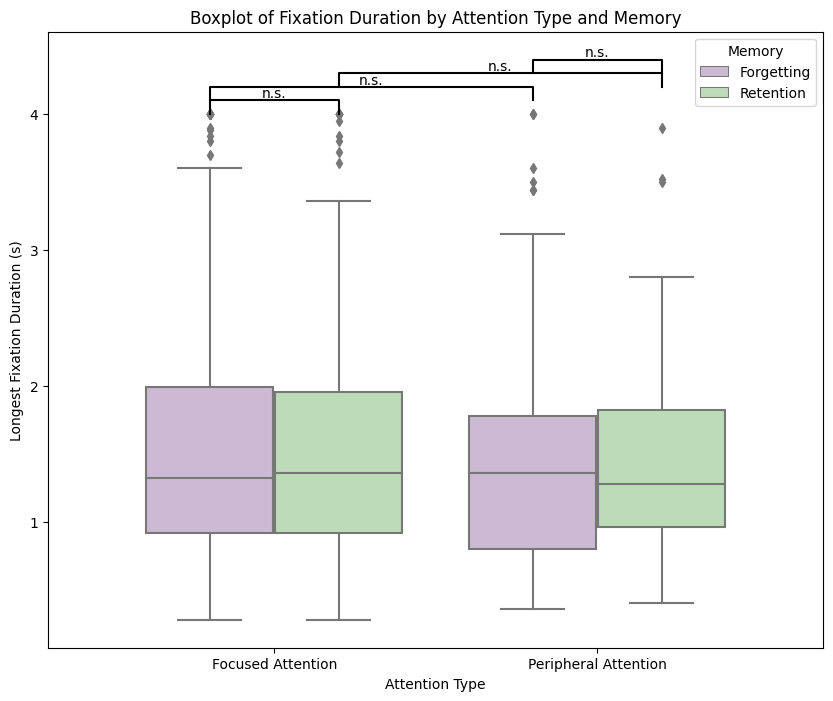

In [ ]:
# First, we need to manually select the groups to compare
from scipy import stats
y = 'duration'
df = gaze_sentence_4s_clean
# Set custom labels
df['Attention Type'] = df['is_distraction'].map({'True': 'Peripheral Attention', 'False': 'Focused Attention'})
df['Memory'] = df['is_rta'].map({True: 'Retention', False: 'Forgetting'})
group1 = df[(df["Attention Type"] == "Focused Attention") & (df["Memory"] == "Forgetting")][y]
group2 = df[(df["Attention Type"] == "Focused Attention") & (df["Memory"] == "Retention")][y]
group3 = df[(df["Attention Type"] == "Peripheral Attention") & (df["Memory"] == "Forgetting")][y]
group4 = df[(df["Attention Type"] == "Peripheral Attention") & (df["Memory"] == "Retention")][y]

# Then, we perform the t-tests between these groups
t_stat_12, p_val_12 = stats.ttest_ind(group1, group2)
t_stat_34, p_val_34 = stats.ttest_ind(group3, group4)
t_stat_13, p_val_13 = stats.ttest_ind(group1, group3)
t_stat_24, p_val_24 = stats.ttest_ind(group2, group4)

# Create boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Attention Type", y=y, hue="Memory", data=df, palette="PRGn", ax=ax)

# Set labels
ax.set_xlabel('Attention Type')
ax.set_ylabel('Longest Fixation Duration (s)')
ax.set_title('Boxplot of Fixation Duration by Attention Type and Memory')

# Calculate maximum y for the annotations
y_max = df[y].max()
h, col = 0.1, 'k'

for i, p_val in enumerate([p_val_12, p_val_13, p_val_24, p_val_34]):
    if p_val < 0.001:
        label = '***'
    elif p_val < 0.01:
        label = '**'
    elif p_val < 0.05:
        label = '*'
    else:
        label = 'n.s.'

    y = y_max + i*0.1  # adjust y position to prevent overlapping
    b = 0.2
    # Adjust x positions for the width of the boxplot
    if i == 0:  # 12 comparison
        x1, x2 = 0, 0.4
    elif i == 1:  # 13 comparison
        x1, x2 = 0, 1
    elif i == 2:  # 24 comparison
        x1, x2 = 0.4, 1.4
    else:  # 34 comparison
        x1, x2 = 1, 1.4
    x1-=b
    x2-=b
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, f'{label}', ha='center', va='bottom', color=col)

plt.show()


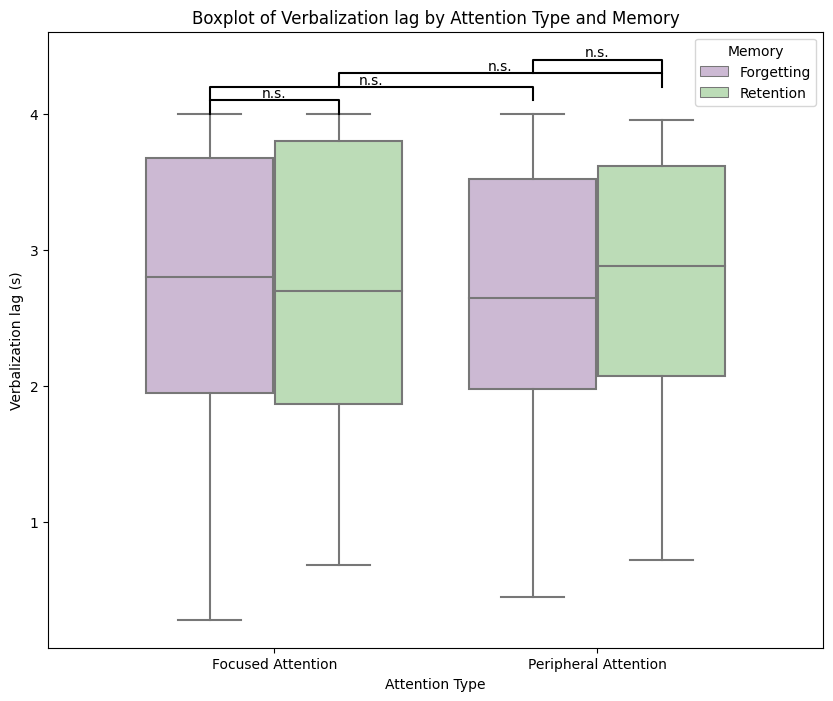

In [ ]:
# First, we need to manually select the groups to compare
from scipy import stats
group1 = df[(df["Attention Type"] == "Focused Attention") & (df["Memory"] == "Forgetting")]["time"]
group2 = df[(df["Attention Type"] == "Focused Attention") & (df["Memory"] == "Retention")]["time"]
group3 = df[(df["Attention Type"] == "Peripheral Attention") & (df["Memory"] == "Forgetting")]["time"]
group4 = df[(df["Attention Type"] == "Peripheral Attention") & (df["Memory"] == "Retention")]["time"]

# Then, we perform the t-tests between these groups
t_stat_12, p_val_12 = stats.ttest_ind(group1, group2)
t_stat_34, p_val_34 = stats.ttest_ind(group3, group4)
t_stat_13, p_val_13 = stats.ttest_ind(group1, group3)
t_stat_24, p_val_24 = stats.ttest_ind(group2, group4)

# Create boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Attention Type", y="time", hue="Memory", data=df, palette="PRGn", ax=ax)

# Set labels
ax.set_xlabel('Attention Type')
ax.set_ylabel('Verbalization lag (s)')
ax.set_title('Boxplot of Verbalization lag by Attention Type and Memory')

# Calculate maximum y for the annotations
y_max = df['time'].max()
h, col = 0.1, 'k'

for i, p_val in enumerate([p_val_12, p_val_13, p_val_24, p_val_34]):
    if p_val < 0.001:
        label = '***'
    elif p_val < 0.01:
        label = '**'
    elif p_val < 0.05:
        label = '*'
    else:
        label = 'n.s.'

    y = y_max + i*0.1  # adjust y position to prevent overlapping
    b = 0.2
    # Adjust x positions for the width of the boxplot
    if i == 0:  # 12 comparison
        x1, x2 = 0, 0.4
    elif i == 1:  # 13 comparison
        x1, x2 = 0, 1
    elif i == 2:  # 24 comparison
        x1, x2 = 0.4, 1.4
    else:  # 34 comparison
        x1, x2 = 1, 1.4
    x1-=b
    x2-=b
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, f'{label}', ha='center', va='bottom', color=col)

plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('time ~ C(is_distraction) + C(is_rta) + C(is_distraction):C(is_rta)', data=gaze_sentence_4s_clean).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(is_distraction),0.000200,1.0,0.000205,0.988574
C(is_rta),0.609721,1.0,0.625850,0.429119
C(is_distraction):C(is_rta),0.442379,1.0,0.454082,0.500600
Residual,771.588848,792.0,NaN,NaN


In [ ]:
model = ols('duration ~ C(is_distraction) + C(is_rta) + C(is_distraction):C(is_rta)', data=gaze_sentence_4s_clean).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(is_distraction),3.251657,1.0,4.538302,0.033452
C(is_rta),0.149164,1.0,0.208186,0.648318
C(is_distraction):C(is_rta),0.014993,1.0,0.020925,0.885019
Residual,567.461549,792.0,NaN,NaN


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define the features for linear regression
features = ['num_words', 'num_syllables', 'num_characters', 'num_complex_words', 'num_long_words', 'speech_duration', 'word_speed']
scaler = StandardScaler()

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Group', 'Dependent Variable', 'R^2', 'Significant Features', 'Weights'])
results2 = pd.DataFrame(columns=['Group', 'R^2'])
results3 = pd.DataFrame(columns=['Group', 'R^2'])


# Group by 'is_distraction' and 'is_rta'
grouped = df.groupby(['is_distraction', 'is_rta'])

# Perform linear regression for each group and each dependent variable
for group_name, group in grouped:
    for dep_var in ['time', 'duration']:
        # Fit the model
        X = group.groupby('p').mean()[features]

        X = scaler.fit_transform(X)

        # Convert the scaled features back to a DataFrame
        X = pd.DataFrame(X, columns=features)
        y = group.groupby('p').mean()[dep_var].values

        # Add a constant to the features matrix for the linear regression intercept
        X = sm.add_constant(X)

        # Fit the model
        model = sm.OLS(y, X)
        model_results = model.fit()

        r2 = model_results.rsquared

        # Get the features with p-value less than 0.05
        significant_features = list(model_results.pvalues[model_results.pvalues < 0.1].index)
        weights = model_results.params[significant_features]

        # Add the results to the DataFrame
        results = results.append({
            'Group': f'is_distraction={group_name[0]}, is_rta={group_name[1]}',
            'Dependent Variable': dep_var,
            'R^2': r2,
            'Significant Features': significant_features,
            'Weights': weights.tolist()
        }, ignore_index=True)

    model = LinearRegression()
    X = group.groupby('p').mean()['time'].values.reshape(-1, 1)
    y = group.groupby('p').mean()['duration'].values.reshape(-1, 1)
    model.fit(X, y)
    r2 = model.score(X, y)
    results2 = results2.append({
              'Group': f'is_distraction={group_name[0]}, is_rta={group_name[1]}',
              # 'Dependent Variable': dep_var,
              'R^2': r2
          }, ignore_index=True)

# print(results)
# results2
results

<ipython-input-96-7e4456a328d5>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X = group.groupby('p').mean()[features]
<ipython-input-96-7e4456a328d5>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = group.groupby('p').mean()[dep_var].values
<ipython-input-96-7e4456a328d5>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-96-7e4456a328d5>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will de

,Group,Dependent Variable,R^2,Significant Features,Weights
0,"is_distraction=False, is_rta=False",time,0.569060,"[const, num_complex_words]","[0.8122449728446024, 0.05950854140207169]"
1,"is_distraction=False, is_rta=False",duration,0.484543,"[const, num_words, num_complex_words, speech_d...","[0.668043971355664, 0.35313185399706853, 0.091..."
2,"is_distraction=False, is_rta=True",time,0.531228,[const],[0.7798271299825135]
3,"is_distraction=False, is_rta=True",duration,0.292100,[const],[0.6203919911010269]
4,"is_distraction=True, is_rta=False",time,0.804127,"[const, num_words, num_characters, num_long_wo...","[0.7966827325701736, 0.2926648256309811, -0.19..."
5,"is_distraction=True, is_rta=False",duration,0.771331,"[const, num_words, num_characters, num_long_wo...","[0.61487160218156, 0.31747800196377596, -0.254..."
6,"is_distraction=True, is_rta=True",time,0.782280,"[const, num_words]","[0.7751701972281653, 0.3504281206986178]"
7,"is_distraction=True, is_rta=True",duration,0.657155,[const],[0.6208695058076867]


In [ ]:
import nltk as nlp
import re
from collections import Counter
# import TRUNAJOD.givenness
# import TRUNAJOD.ttr
# from TRUNAJOD import surface_proxies
# from TRUNAJOD.syllabizer import Syllabizer
import spacy
from nltk.parse.stanford import StanfordParser

def lexical_complexity(df):

  def ttr(row):
    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()
    tokens=nlp.word_tokenize(s)
    types=nlp.Counter(tokens)
    if len(tokens) == 0:
      # print(row)
      return 0
    return (len(types)/len(tokens))

  def calculate_clause_density(row):
    # Tokenize the sentence into individual words and punctuation marks
    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()
    tokens = nlp.word_tokenize(s)

    # Perform part-of-speech (POS) tagging
    pos_tags = nlp.pos_tag(tokens)

    # Identify the number of clauses based on specific POS patterns
    clause_count = 0
    for i in range(len(pos_tags) - 1):
        if pos_tags[i][1].startswith('VB') and pos_tags[i + 1][1] == 'PRP':
            clause_count += 1

    # Calculate the clause density by dividing the number of clauses by the number of words
    clause_density = clause_count / len(tokens)

    return clause_density

  def calculate_subordination_index(row):
    # Load the spaCy English model

    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()

    # Process the sentence
    doc = nlp_(s)

    # Count the number of subordinating conjunctions ('mark' dependency with a subordinating relation)
    subordination_count = 0
    for token in doc:
        if token.dep_ == 'mark':
            subordination_count += 1

    # Calculate the subordination index by dividing the number of subordinating conjunctions by the total number of clauses
    clause_count = len(list(doc.sents))
    subordination_index = subordination_count / clause_count

    return subordination_index

  def calculate_sci(row):
    # Load the spaCy English model

    # Process the sentence
    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()

    # Process the sentence
    doc = nlp_(s)

    # Count the number of clauses (identified using the 'S' label)
    clause_count = len([token for token in doc if token.dep_ == 'ROOT'])

    # Calculate the number of verb phrases (VP) and noun phrases (NP)
    vp_count = len([chunk for chunk in doc.noun_chunks if chunk.root.pos_ == 'VERB'])
    np_count = len(list(doc.noun_chunks))

    if np_count == 0:
        return 0  # Return 0 as the SCI

    # Calculate the SCI based on the formula: SCI = 0.5 * (VP/NP) + 0.5 * (Clause Count)
    sci = 0.5 * (vp_count / np_count) + 0.5 * clause_count

    return sci

  def calculate_stop_word_ratio(row):
    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()
    tokens = nlp.word_tokenize(s)
    stopwords_x = [w for w in tokens if w in stopwords.words('english')]
    stopwords_x.extend(['huh'])

    return len(stopwords_x) / len(tokens) * 100

  def calculate_simpsons_di(row):
    # Load the spaCy English model

    # Process the sentence
    s= re.sub(r'[^\w]', ' ', row['sentence'])
    s=s.lower()

    # Process the sentence
    doc = nlp_(s)

    # Count the frequency of each word
    word_counts = Counter(doc)

    # Calculate the probability of each word
    word_probabilities = {word: count / len(doc) for word, count in word_counts.items()}

    # Calculate the sum of squared probabilities
    sum_squared_probs = sum(prob ** 2 for prob in word_probabilities.values())

    # Calculate Simpson's Diversity Index
    simpsons_di = 1 / sum_squared_probs

    return simpsons_di

  # def calculate_FK(row):


  df=df.copy()
  df = df[df['sentence'].str.len()>0]
  df['lexical diversity TTR']= df.apply(lambda row: ttr(row), axis=1)
  df['Simpson\'s Diversity Index']= df.apply(lambda row: calculate_simpsons_di(row), axis=1)
  df['clause density'] = df.apply(lambda row: calculate_clause_density(row), axis=1)
  df['subordination_index'] = df.apply(lambda row: calculate_subordination_index(row), axis=1)
  df['syntactic complexity index (SCI)'] = df.apply(lambda row: calculate_sci(row), axis=1)
  df['stop word ratio'] = df.apply(lambda row: calculate_stop_word_ratio(row), axis=1)
  return df
nlp_ = spacy.load('en_core_web_sm')

In [ ]:
df_sentence_proc_2s = lexical_complexity(gaze_sentence_2s_clean)
df_sentence_proc_1s = lexical_complexity(gaze_sentence_1s_clean)
df_sentence_proc_3s = lexical_complexity(gaze_sentence_3s_clean)
df_sentence_proc_4s = lexical_complexity(gaze_sentence_4s_clean)
# df_sentence_proc_05s = lexical_complexity(gaze_sentence_05s[-1])

In [ ]:
df_sentence_proc_1s

,p,time,duration,num_words,num_syllables,num_characters,sentence,num_complex_words,num_long_words,speech_duration,word_speed,videoNum,is_distraction,is_rta,lexical diversity TTR,Simpson's Diversity Index,clause density,subordination_index,syntactic complexity index (SCI),stop word ratio
0,P18,0.96,0.44,2,2,8,black van,0,0,1.130535,1.769074,5,False,False,1.000000,2.0,0.0,0.0,0.5,50.000000
1,P18,0.44,0.44,4,5,16,caring for the mean,0,0,1.340535,2.983883,5,False,False,1.000000,4.0,0.0,0.0,0.5,75.000000
2,P18,1.00,1.00,4,6,18,marching to the loved,0,1,1.580535,2.530789,5,False,False,1.000000,4.0,0.0,0.0,0.0,75.000000
3,P18,1.00,1.00,6,9,25,another plaza on my right side,1,1,2.390535,2.509898,5,True,False,1.000000,6.0,0.0,0.0,0.5,50.000000
5,P18,0.92,0.88,10,13,42,building and there's on the loved and looks li...,0,2,3.270000,3.058104,5,True,False,0.909091,11.0,0.0,0.0,0.5,63.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,P1,1.00,1.00,7,9,31,the club course coming from the sites,0,0,2.510000,2.788845,1,False,False,0.857143,7.0,0.0,0.0,0.5,57.142857
2778,P1,1.00,1.00,2,2,8,ten right,0,0,1.030000,1.941748,1,False,False,1.000000,2.0,0.0,0.0,0.0,50.000000
2780,P1,0.44,0.44,2,2,7,is clear,0,0,1.260000,1.587302,1,False,False,1.000000,2.0,0.0,0.0,0.0,100.000000
2781,P1,0.48,0.44,4,4,13,look on the left,0,0,1.390000,2.877698,1,False,False,1.000000,4.0,0.0,0.0,0.0,75.000000


In [ ]:
print(scipy.stats.chisquare(df_sentence_proc_1s.groupby(['is_rta', 'is_distraction']).count()['p'].values, axis=None))
df_sentence_proc_1s.to_csv('gaze_sentence_1s_clean.csv')
df_sentence_proc_2s.to_csv('gaze_sentence_2s_clean.csv')
df_sentence_proc_3s.to_csv('gaze_sentence_3s_clean.csv')
df_sentence_proc_4s.to_csv('gaze_sentence_4s_clean.csv')
df_sentence_proc_1s.groupby(['is_rta', 'is_distraction']).count()['p']


Power_divergenceResult(statistic=431.95935828877003, pvalue=2.641682305281285e-93)


is_rta  is_distraction
False   False             846
        True              383
True    False             385
        True              256
Name: p, dtype: int64

<Figure size 2500x1500 with 0 Axes>

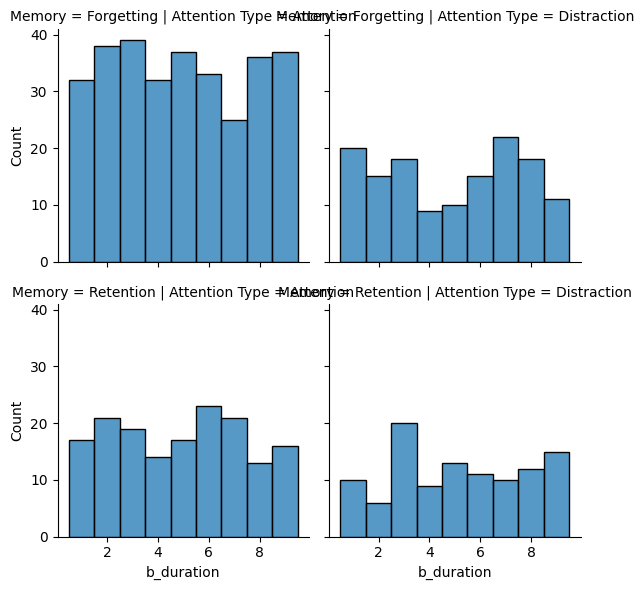

Text(0, 0.5, 'Fixation duration (s)')

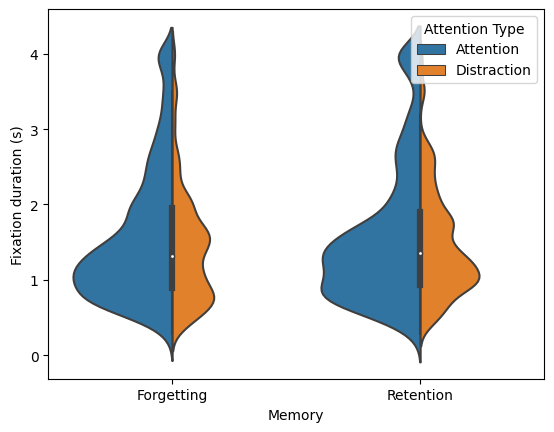

In [ ]:
from pandas.plotting import parallel_coordinates
plt.rcParams.update({'font.size': 10})
data = df_sentence_proc_4s.copy()
# y = 'is_rta'
data = data.rename(columns={'is_rta':'Memory', 'is_distraction':'Attention Type'})
# # data ['ncomplex_ratio'] = data['num_syllables']/data['num_words']
z = 'duration'
z_name='Fixation duration (s)'
# z = 'time'
# z_name='Verbalization lag (s)'

# data[y] = data[y].astype(str)
# data = data[['time', 'duration',y,z]]
# # parallel_coordinates(data, y, color=['#1f77b4', '#ff7f0e'])
# sns.kdeplot(
#     data=data, x="duration", y=z, hue=y, fill=False,
# )
# labels = ['s','slow','med','f','fast']
# bins = [0, data['word_speed'].quantile(0.2),data['word_speed'].quantile(0.4), data['word_speed'].quantile(0.6),data['word_speed'].quantile(0.8), data['word_speed'].quantile(1)]
bins = [data[z].quantile(i*0.1) for i in range(10)]
labels = [i+1 for i in range(len(bins)-1)]
# labels = bins[1:]

data.loc[data['Attention Type']=='True','Attention Type'] = 'Distraction'
data.loc[data['Attention Type']=='False','Attention Type'] = 'Attention'

data.loc[data['Memory']==True,'Memory'] = 'Retention'
data.loc[data['Memory']==False,'Memory'] = 'Forgetting'

data['b_'+z] = pd.cut(data[z], bins=bins, labels=labels)
plt.figure(figsize=(25,15))
g = sns.FacetGrid(data, col="Attention Type",  row="Memory")
# g.map_dataframe(sns.kdeplot, x="duration", y="word_speed")
g.map_dataframe(sns.histplot, x="b_"+z, binwidth=0.5)
plt.show()

ax=sns.violinplot(data=data, hue='Attention Type', x='Memory', y=z, split=True, scale="count", bw=.2)
ax.set_ylabel(z_name)

<ipython-input-38-14a36f8a376e>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.FacetGrid(data.groupby(['p','Attention Type', 'Memory']).mean().reset_index(), row="Attention Type",  col="Memory", margin_titles=True)


<Figure size 2500x1500 with 0 Axes>

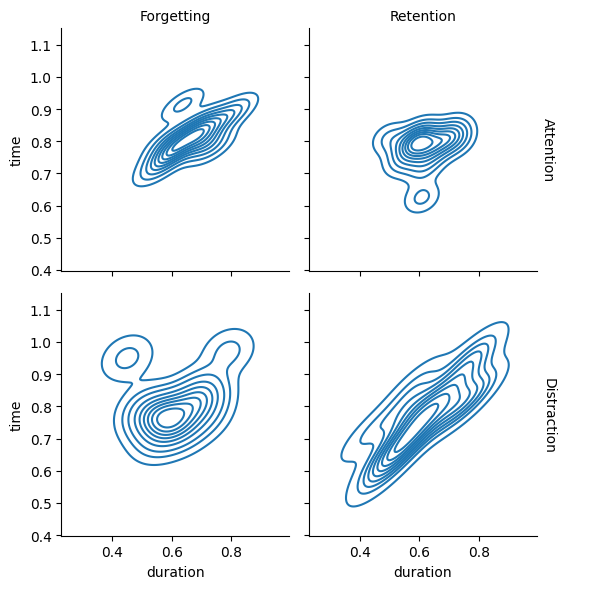

In [ ]:
data = df_sentence_proc_1s.copy()
# y = 'is_rta'
data = data.rename(columns={'is_rta':'Memory', 'is_distraction':'Attention Type'})
# # data ['ncomplex_ratio'] = data['num_syllables']/data['num_words']
z = 'duration'
z_name='Fixation duration (s)'
# z = 'time'
# z_name='Verbalization lag (s)'

# data[y] = data[y].astype(str)
# data = data[['time', 'duration',y,z]]
# # parallel_coordinates(data, y, color=['#1f77b4', '#ff7f0e'])
# sns.kdeplot(
#     data=data, x="duration", y=z, hue=y, fill=False,
# )
# labels = ['s','slow','med','f','fast']
# bins = [0, data['word_speed'].quantile(0.2),data['word_speed'].quantile(0.4), data['word_speed'].quantile(0.6),data['word_speed'].quantile(0.8), data['word_speed'].quantile(1)]
bins = [data[z].quantile(i*0.1) for i in range(10)]
labels = [i+1 for i in range(len(bins)-1)]
# labels = bins[1:]

def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.6, .3, f"N = {n}", transform=ax.transAxes)

data.loc[data['Attention Type']=='True','Attention Type'] = 'Distraction'
data.loc[data['Attention Type']=='False','Attention Type'] = 'Attention'

data.loc[data['Memory']==True,'Memory'] = 'Retention'
data.loc[data['Memory']==False,'Memory'] = 'Forgetting'

data['b_'+z] = pd.cut(data[z], bins=bins, labels=labels)
plt.figure(figsize=(25,15))
g = sns.FacetGrid(data.groupby(['p','Attention Type', 'Memory']).mean().reset_index(), row="Attention Type",  col="Memory", margin_titles=True)
g.map_dataframe(sns.kdeplot, x="duration", y="time")
# g.map_dataframe(sns.lmplot, x="duration", y="time")
g.add_legend()
# g.map_dataframe(annotate)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

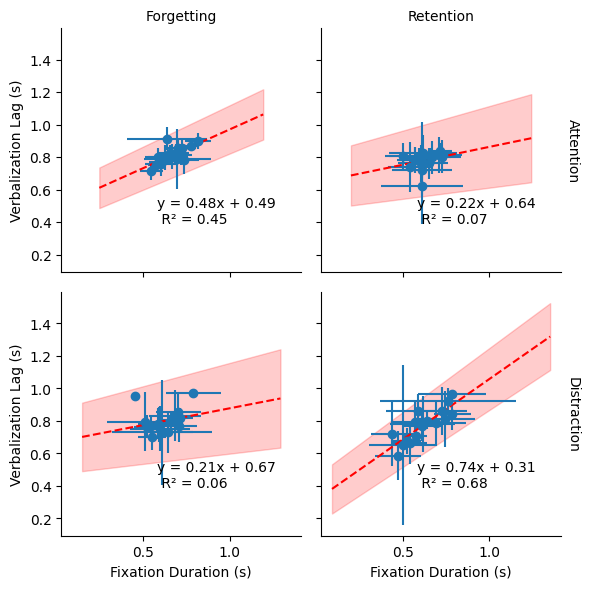

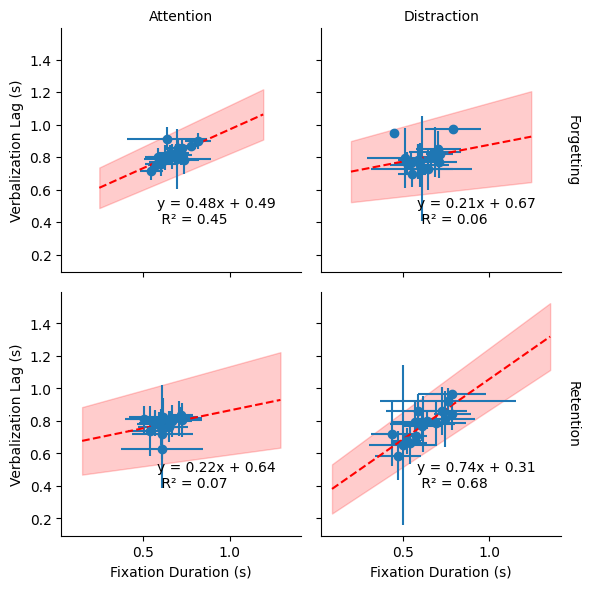

In [ ]:
grouped = data.groupby(['Memory', 'Attention Type', 'p']).agg(
    mean_time=('time', 'mean'),
    std_time=('time', 'std'),
    mean_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    n=('time', 'count')
)

# Calculate the 95% confidence interval
grouped['ci_time'] = 1.96 * (grouped['std_time'] / np.sqrt(grouped['n']))
grouped['ci_duration'] = 1.96 * (grouped['std_duration'] / np.sqrt(grouped['n']))

grouped = grouped.reset_index()

# Define a function to create an error bar plot
# Define a function to create an error bar plot
def errorplot(x, y, data, **kwargs):
    data = data.copy()
    x_col = x.split('_')[1]  # Extract 'time' or 'duration' from 'mean_time' or 'mean_duration'
    y_col = y.split('_')[1]  # Extract 'time' or 'duration' from 'mean_time' or 'mean_duration'
    data['x_lower'] = data[x] - data[f'ci_{x_col}']
    data['x_upper'] = data[x] + data[f'ci_{x_col}']
    data['y_lower'] = data[y] - data[f'ci_{y_col}']
    data['y_upper'] = data[y] + data[f'ci_{y_col}']
    plt.errorbar(x=data[x], y=data[y], xerr=[data[x] - data['x_lower'], data['x_upper'] - data[x]],
                 yerr=[data[y] - data['y_lower'], data['y_upper'] - data[y]], fmt='o', **kwargs)
    # plt.xlabel('Fixation Duration (s)')
    # plt.ylabel('Verbalization Lag (s)')

# def annotate_regline(x, y, data, **kwargs):
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data[x], data[y])
#     plt.text(0.6, 0.2, f'y = {slope:.2f}x + {intercept:.2f}', transform=plt.gca().transAxes)

def annotate_regline(x, y, data, **kwargs):
    # Compute the regression line
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data[x], data[y])

    # Compute the prediction interval
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = intercept + slope * x_vals
    t_val = scipy.stats.t.ppf(1-0.05/2, df=len(data[x])-2)  # t-critical value for 95% CI
    sum_sq_dev = np.sum((data[x] - np.mean(data[x]))**2)
    MSE = np.sum((data[y] - (intercept + slope * data[x]))**2) / (len(data[x]) - 2)
    ci = t_val * np.sqrt(MSE * (1/len(data[x]) + (x_vals - np.mean(data[x]))**2 / sum_sq_dev))

    # Plot the regression line and its prediction interval
    plt.plot(x_vals, y_vals, '--', color='red')
    plt.fill_between(x_vals, y_vals - ci, y_vals + ci, color='red', alpha=0.2)

    # Annotate the regression line equation
    plt.text(0.4, 0.2, f'y = {slope:.2f}x + {intercept:.2f}\n R² = {r_value**2:.2f}', transform=plt.gca().transAxes)

# Create a FacetGrid with the data
g = sns.FacetGrid(grouped, row="Attention Type",  col="Memory", margin_titles=True)

# Map the errorplot function to the FacetGrid
g.map_dataframe(errorplot, x='mean_duration', y='mean_time')
# g.map_dataframe(errorplot, x='p', y='mean_duration')
# Add regression lines
# g.map_dataframe(sns.regplot, x='mean_duration', y='mean_time', scatter=False, color='red')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()


# Annotate regression lines
g.map_dataframe(annotate_regline, x='mean_duration', y='mean_time')
g.set_axis_labels('Fixation Duration (s)', 'Verbalization Lag (s)')

plt.show()

# Create a FacetGrid with the data
g = sns.FacetGrid(grouped, col="Attention Type",  row="Memory", margin_titles=True)

# Map the errorplot function to the FacetGrid
g.map_dataframe(errorplot, x='mean_duration', y='mean_time')
# g.map_dataframe(errorplot, x='p', y='mean_duration')
# Add regression lines
# g.map_dataframe(sns.regplot, x='mean_duration', y='mean_time', scatter=False, color='red')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()


# Annotate regression lines
g.map_dataframe(annotate_regline, x='mean_duration', y='mean_time')
g.set_axis_labels('Fixation Duration (s)', 'Verbalization Lag (s)')

plt.show()


In [ ]:
data.groupby(['p','Attention Type', 'Memory']).mean().reset_index()

<ipython-input-77-415a91c151d2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['p','Attention Type', 'Memory']).mean().reset_index()


,p,Attention Type,Memory,time,duration,num_words,num_syllables,num_characters,num_complex_words,num_long_words,speech_duration,word_speed
0,P1,Attention,Forgetting,0.767021,0.600213,5.914894,7.574468,25.468085,0.191489,0.680851,2.191447,2.789650
1,P1,Attention,Retention,0.807500,0.501500,6.600000,8.800000,27.800000,0.350000,0.950000,2.517921,2.654960
2,P1,Distraction,Forgetting,0.697143,0.550238,6.428571,8.523810,27.380952,0.309524,0.833333,2.260911,2.808251
3,P1,Distraction,Retention,0.675625,0.522813,5.656250,7.906250,25.062500,0.281250,0.875000,2.257651,2.560171
4,P10,Attention,Forgetting,0.857292,0.702083,6.104167,7.812500,24.937500,0.395833,0.770833,3.520430,2.152063
...,...,...,...,...,...,...,...,...,...,...,...,...
63,P8,Distraction,Retention,0.858000,0.728000,5.400000,7.000000,23.000000,0.000000,0.800000,2.039370,2.622171
64,P9,Attention,Forgetting,0.788000,0.698000,4.000000,4.400000,13.400000,0.000000,0.400000,3.106000,1.724140
65,P9,Attention,Retention,0.717778,0.611111,5.333333,6.444444,19.333333,0.111111,0.333333,2.541111,2.123208
66,P9,Distraction,Forgetting,0.970000,0.790000,7.250000,8.750000,25.000000,0.250000,1.000000,2.110000,3.350157


is rta False is_distraction False
[0.37731368 0.11030691 0.08700991 0.0754924  0.07277291 0.06831897
 0.06166179 0.05545101 0.04557689 0.03349687 0.00977012 0.00139391
 0.00104804 0.00038658]


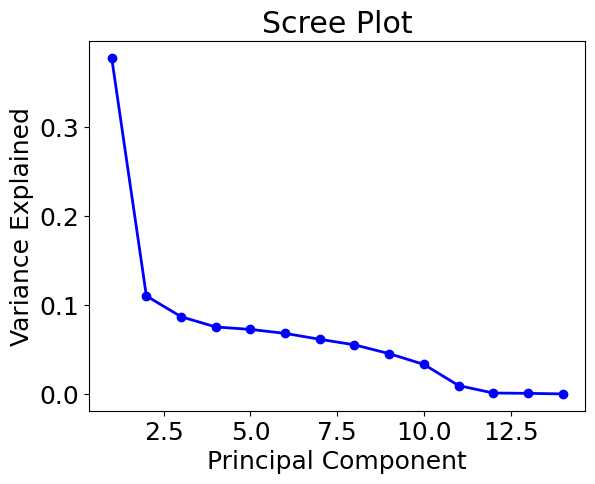

            PC1    PC2    PC3   time  duration
PC1       1.000 -0.724 -0.789 -0.780    -0.710
PC2      -0.724  1.000  0.972  0.309     0.186
PC3      -0.789  0.972  1.000  0.309     0.219
time     -0.780  0.309  0.309  1.000     0.967
duration -0.710  0.186  0.219  0.967     1.000
          PC1  PC2  PC3  time  duration
PC1       1.0 -0.0  0.0   NaN       NaN
PC2      -0.0  1.0 -0.0   NaN       NaN
PC3       0.0 -0.0  1.0   NaN       NaN
time      NaN  NaN  NaN   NaN       NaN
duration  NaN  NaN  NaN   NaN       NaN
is rta False is_distraction True
[3.98863315e-01 1.12494772e-01 7.94338150e-02 7.39905924e-02
 7.03585038e-02 6.68960504e-02 6.23515957e-02 5.45378082e-02
 3.81469357e-02 3.29661392e-02 7.68724833e-03 1.13575199e-03
 8.41545714e-04 2.95926629e-04]


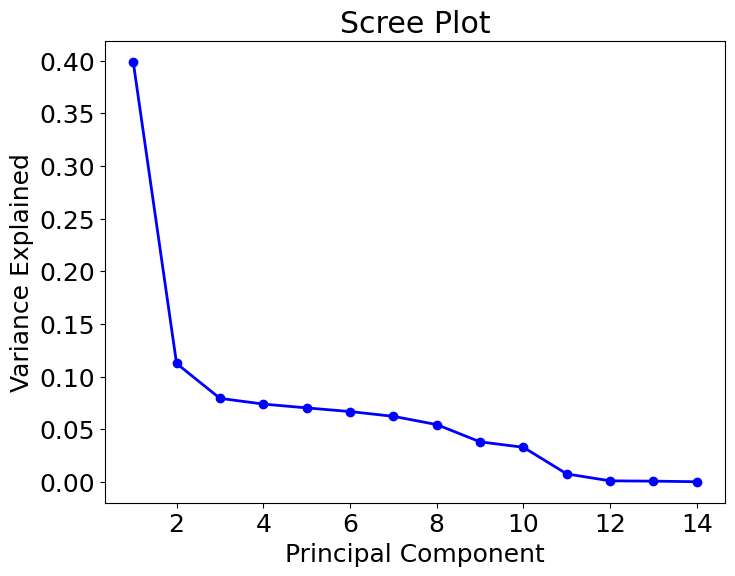

          PC1  PC2  PC3  time  duration
PC1       1.0 -1.0 -1.0  -1.0      -1.0
PC2      -1.0  1.0  1.0   1.0       1.0
PC3      -1.0  1.0  1.0   1.0       1.0
time     -1.0  1.0  1.0   1.0       1.0
duration -1.0  1.0  1.0   1.0       1.0
          PC1  PC2  PC3  time  duration
PC1       1.0 -0.0 -0.0   NaN       NaN
PC2      -0.0  1.0  0.0   NaN       NaN
PC3      -0.0  0.0  1.0   NaN       NaN
time      NaN  NaN  NaN   NaN       NaN
duration  NaN  NaN  NaN   NaN       NaN
is rta True is_distraction False
[3.84135403e-01 1.16937454e-01 8.11664176e-02 7.34231357e-02
 7.02382782e-02 6.32597396e-02 6.15716702e-02 5.96077907e-02
 4.85820609e-02 3.00766810e-02 8.39040002e-03 1.36644366e-03
 9.69823740e-04 2.74701205e-04]


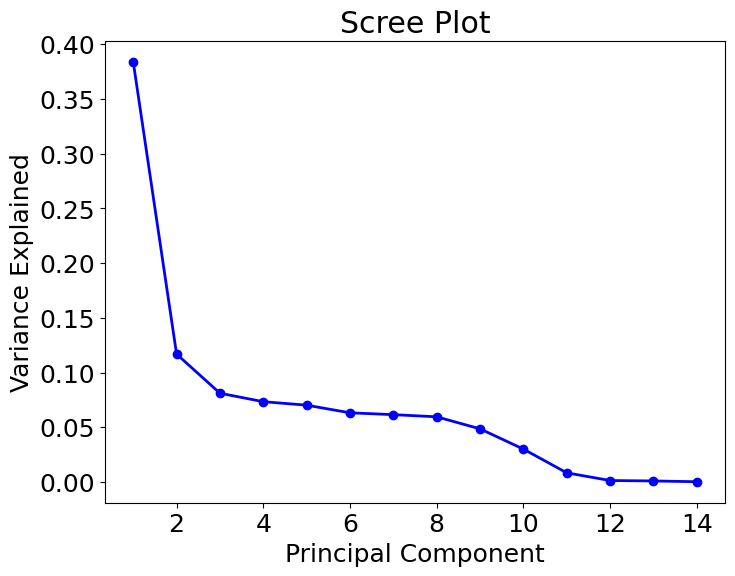

          PC1  PC2  PC3  time  duration
PC1       1.0  1.0 -1.0   1.0       1.0
PC2       1.0  1.0 -1.0   1.0       1.0
PC3      -1.0 -1.0  1.0  -1.0      -1.0
time      1.0  1.0 -1.0   1.0       1.0
duration  1.0  1.0 -1.0   1.0       1.0
          PC1  PC2  PC3  time  duration
PC1       1.0 -0.0 -0.0   NaN       NaN
PC2      -0.0  1.0 -0.0   NaN       NaN
PC3      -0.0 -0.0  1.0   NaN       NaN
time      NaN  NaN  NaN   NaN       NaN
duration  NaN  NaN  NaN   NaN       NaN
is rta True is_distraction True
[3.90887143e-01 9.92798569e-02 9.03738105e-02 8.51229408e-02
 7.18316797e-02 6.97266408e-02 6.30187178e-02 5.43302026e-02
 3.90341960e-02 2.47783108e-02 9.54185641e-03 1.14435497e-03
 7.33030757e-04 1.97258910e-04]


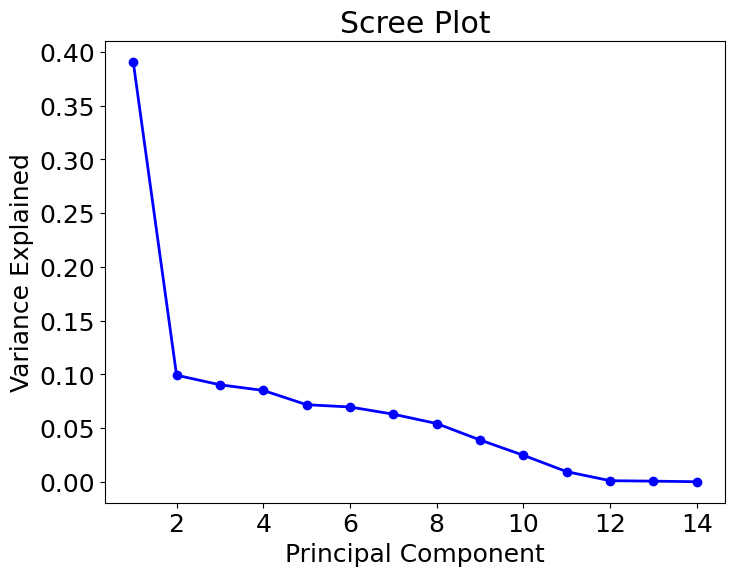

          PC1  PC2  PC3  time  duration
PC1       1.0 -1.0  1.0  -1.0      -1.0
PC2      -1.0  1.0 -1.0   1.0       1.0
PC3       1.0 -1.0  1.0  -1.0      -1.0
time     -1.0  1.0 -1.0   1.0       1.0
duration -1.0  1.0 -1.0   1.0       1.0
          PC1  PC2  PC3  time  duration
PC1       1.0 -0.0 -0.0   NaN       NaN
PC2      -0.0  1.0 -0.0   NaN       NaN
PC3      -0.0 -0.0  1.0   NaN       NaN
time      NaN  NaN  NaN   NaN       NaN
duration  NaN  NaN  NaN   NaN       NaN


<Figure size 800x600 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
kkk = df_sentence_proc_1s
# ddd = df_sentence_proc_2s.drop(['p', 'duration','time', 'sentence'], axis=1).copy()
# ddd = kkk.drop(['p', 'duration','time', 'sentence', 'clause density', 'lexical diversity TTR', 'stop word ratio', 'is_distraction', 'is_rta'], axis=1).copy()
for i in kkk['is_rta'].unique():
  for j in kkk['is_distraction'].unique():
    print('is rta',i, 'is_distraction', j)
    ddd = kkk[(kkk['is_rta'] == i) & (kkk['is_distraction']==j)]
    ddd = ddd.drop(['p', 'duration','time', 'sentence', 'is_distraction', 'is_rta'], axis=1).copy()
    # ddd = df_sentence_proc_2s.drop(['duration','time', 'sentence', 'clause density', 'lexical diversity TTR', 'stop word ratio'], axis=1).groupby(['p']).mean().copy()
    df_sentence_proc_dd = kkk.copy()
    # df_sentence_proc_2s_dd = df_sentence_proc_2s.groupby(['p']).mean().copy()
    scaler = StandardScaler()
    ddd=pd.DataFrame(scaler.fit_transform(ddd), columns=ddd.columns)
    pca = PCA(n_components=ddd.shape[1])
    dd_red = pca.fit_transform(ddd)
    print(pca.explained_variance_ratio_)
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()
    fig = plt.figure(1, figsize=(8, 6))
    # ax = fig.add_subplot(111, projection="3d", elev=-150, azim=130)
    # ax.scatter(
    #     dd_red[:, 0],
    #     dd_red[:, 1],
    #     df_sentence_proc_dd['duration'],
    #     # c=y,
    #     cmap=plt.cm.Set1,
    #     edgecolor="k",
    #     s=40,
    # )
    # ax.scatter(
    #     dd_red[:, 0],
    #     dd_red[:, 1],
    #     df_sentence_proc_dd['time'],
    #     # c=y,
    #     cmap=plt.cm.Set1,
    #     edgecolor="k",
    #     s=40,
    # )
    # plt.show()
    # import statsmodels.api as sm
    # x = ddd
    # x = sm.add_constant(x)
    # y = df_sentence_proc_dd['duration'].values
    # mod = sm.OLS(y, x)
    # res = mod.fit()
    # print(res.summary())

    dd_redd = dd_red[:, 0].copy()
    dd_redd = pd.DataFrame(dd_redd, columns=['PC1'])
    dd_redd['PC2'] = dd_red[:, 1]
    dd_redd['PC3'] = dd_red[:, 2]
    dd_redd['time'] = df_sentence_proc_dd['time']
    dd_redd['duration'] = df_sentence_proc_dd['duration']
    dd_redd['p'] = df_sentence_proc_dd['p']
    dd_redd_m = dd_redd.groupby('p').mean().reset_index().drop('p', axis=1)
    print(pd.DataFrame(np.round(np.corrcoef(dd_redd_m.T.values),3), columns=dd_redd_m.columns, index=dd_redd_m.columns))
    dd_redd_m2 = dd_redd.drop('p', axis=1)
    print(pd.DataFrame(np.round(np.corrcoef(dd_redd_m2.T.values),3), columns=dd_redd_m2.columns, index=dd_redd_m2.columns))

is rta False is_distraction False
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


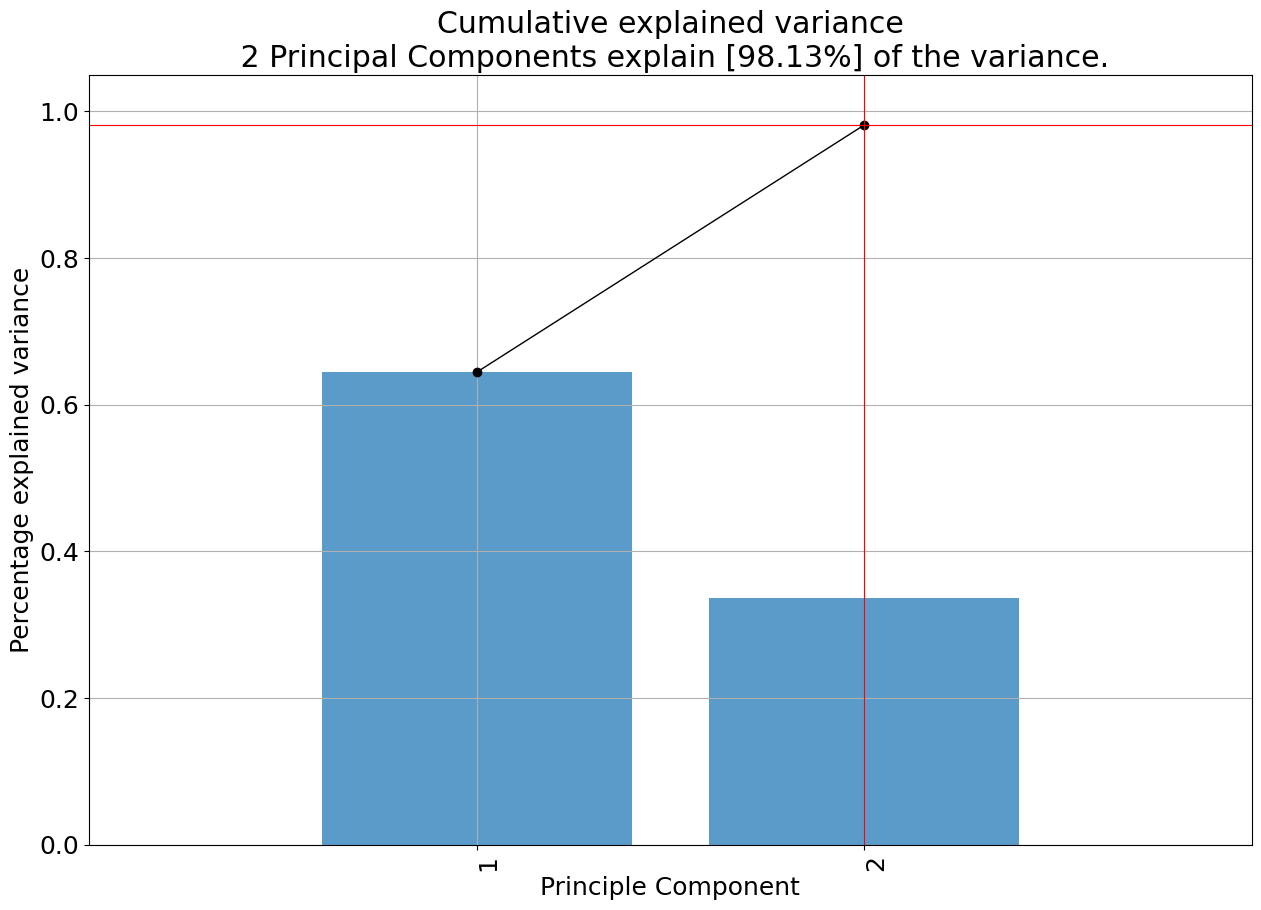

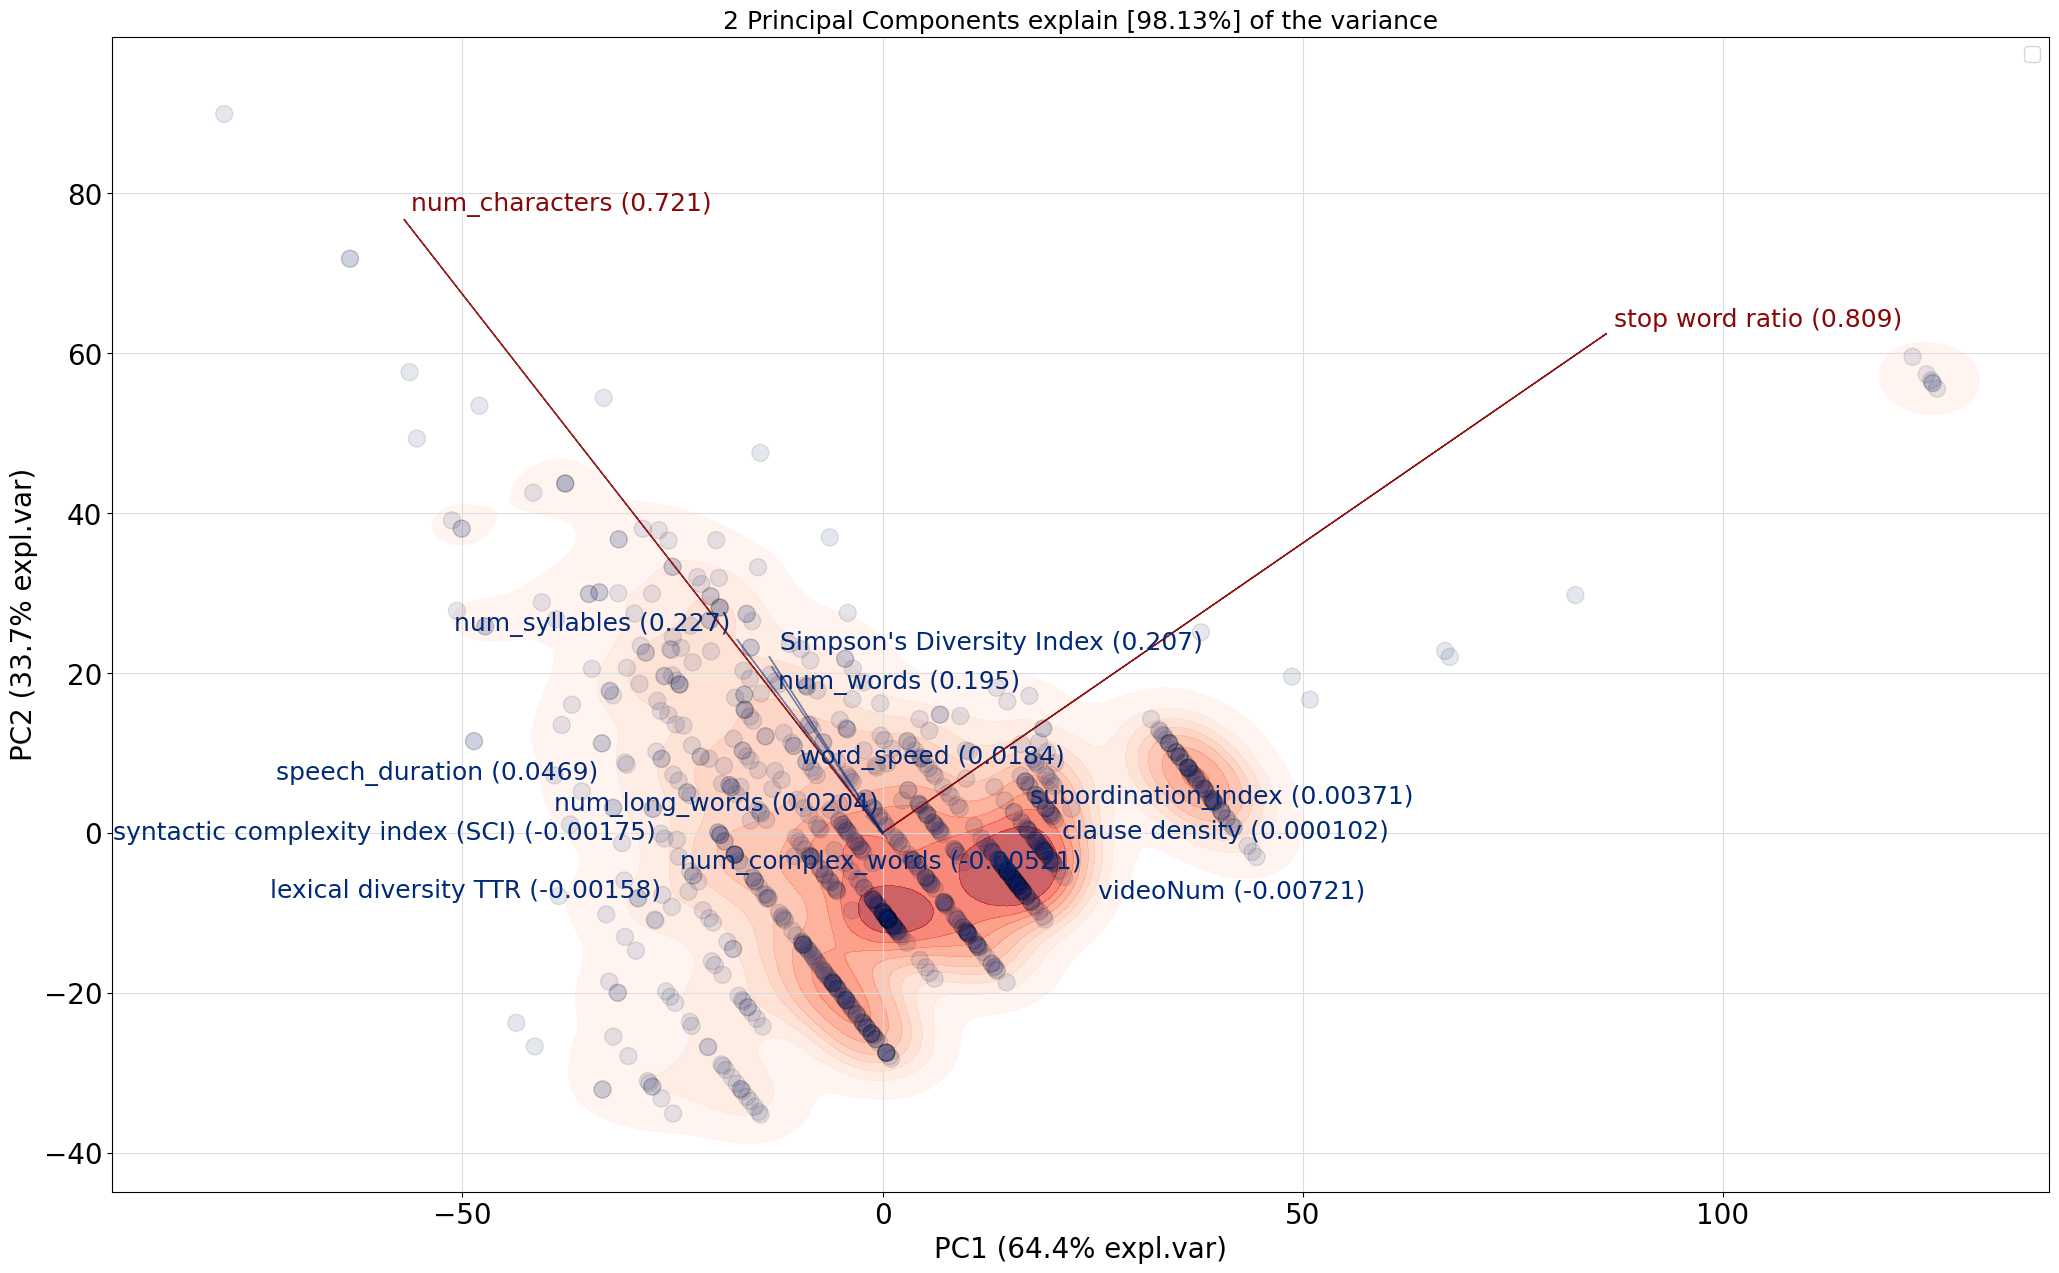

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string


is rta False is_distraction True
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


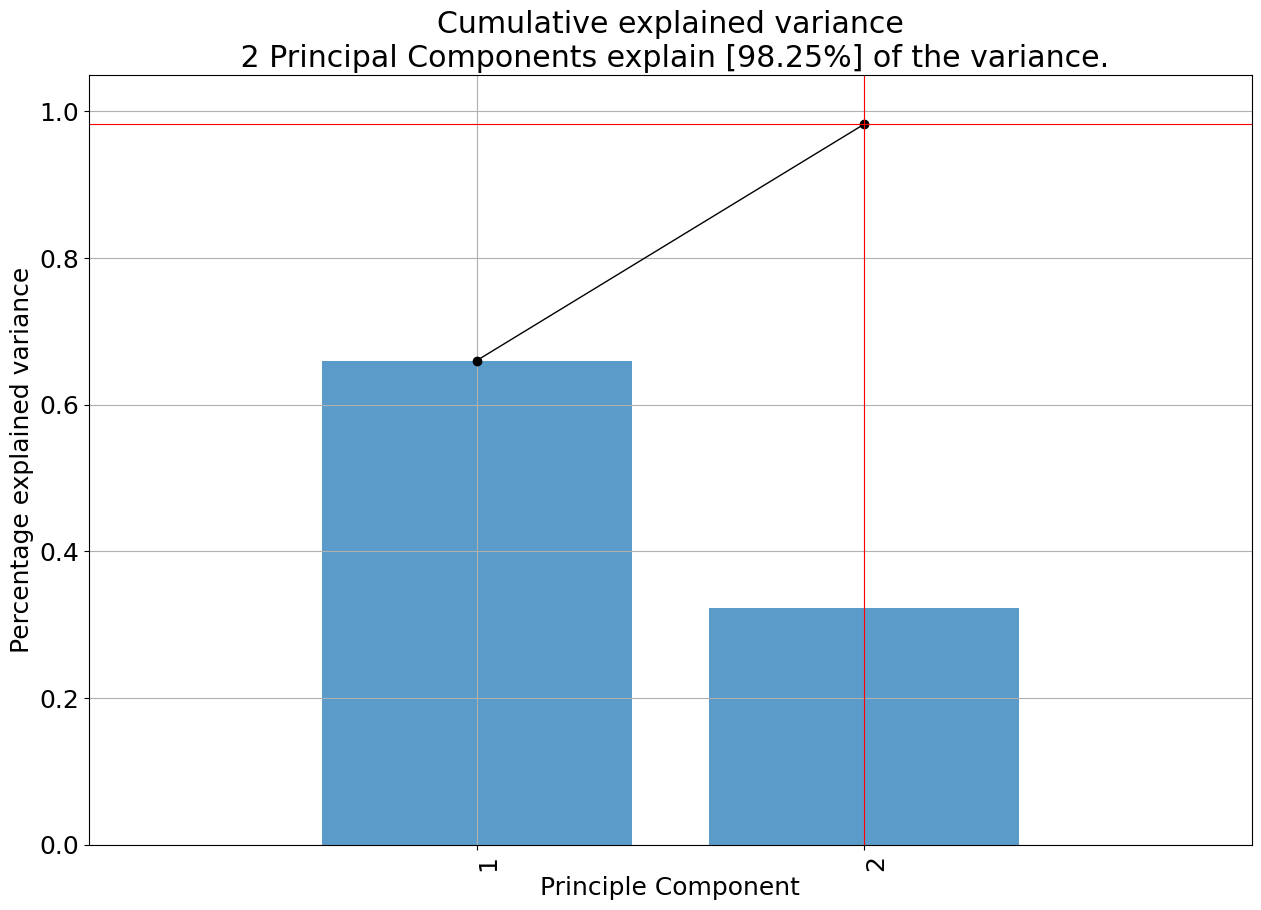

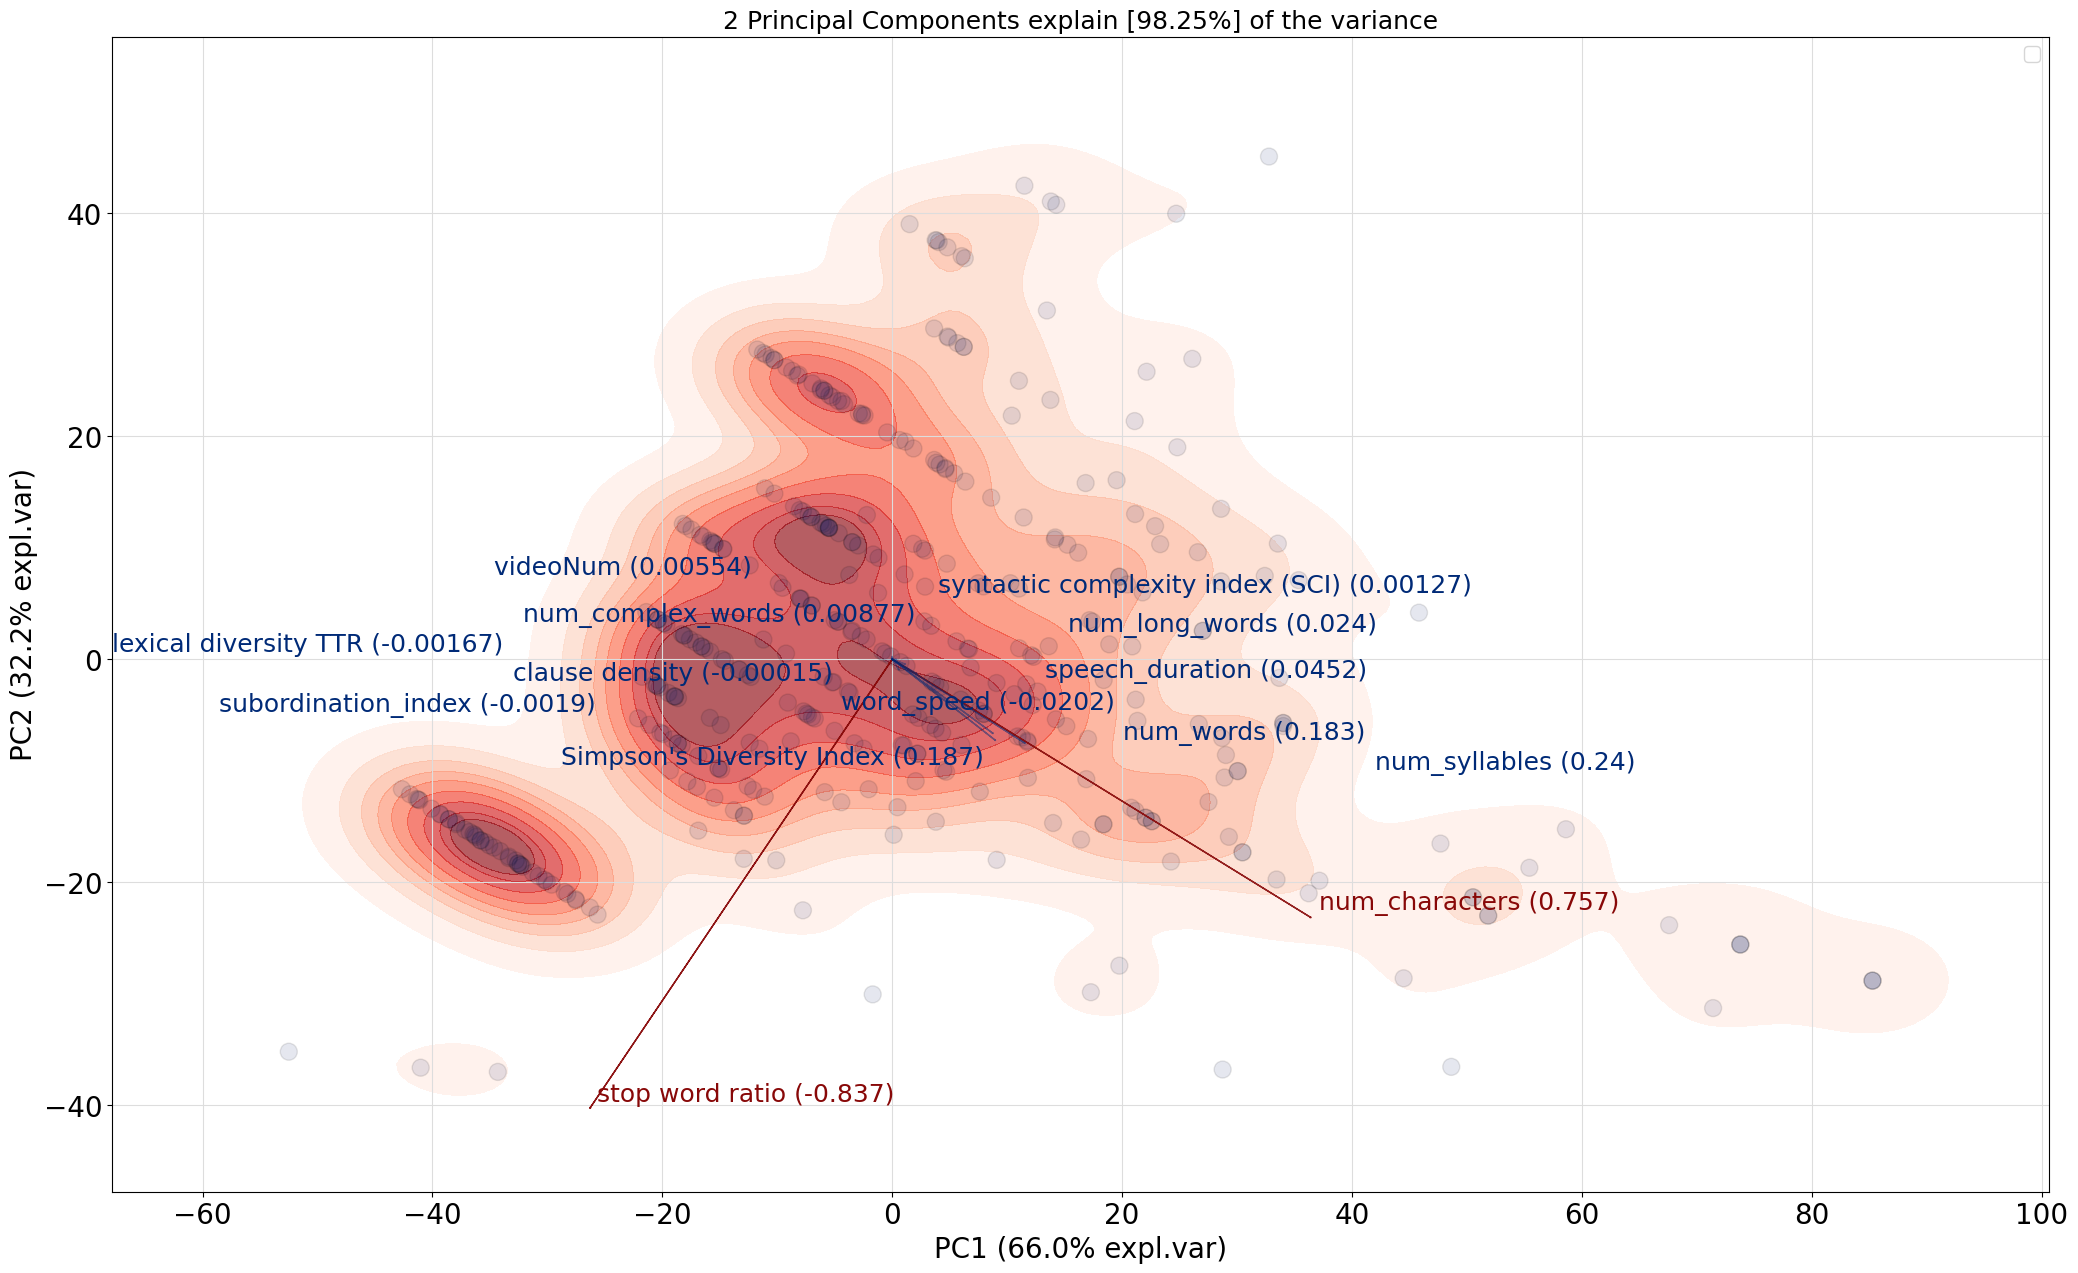

is rta True is_distraction False
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


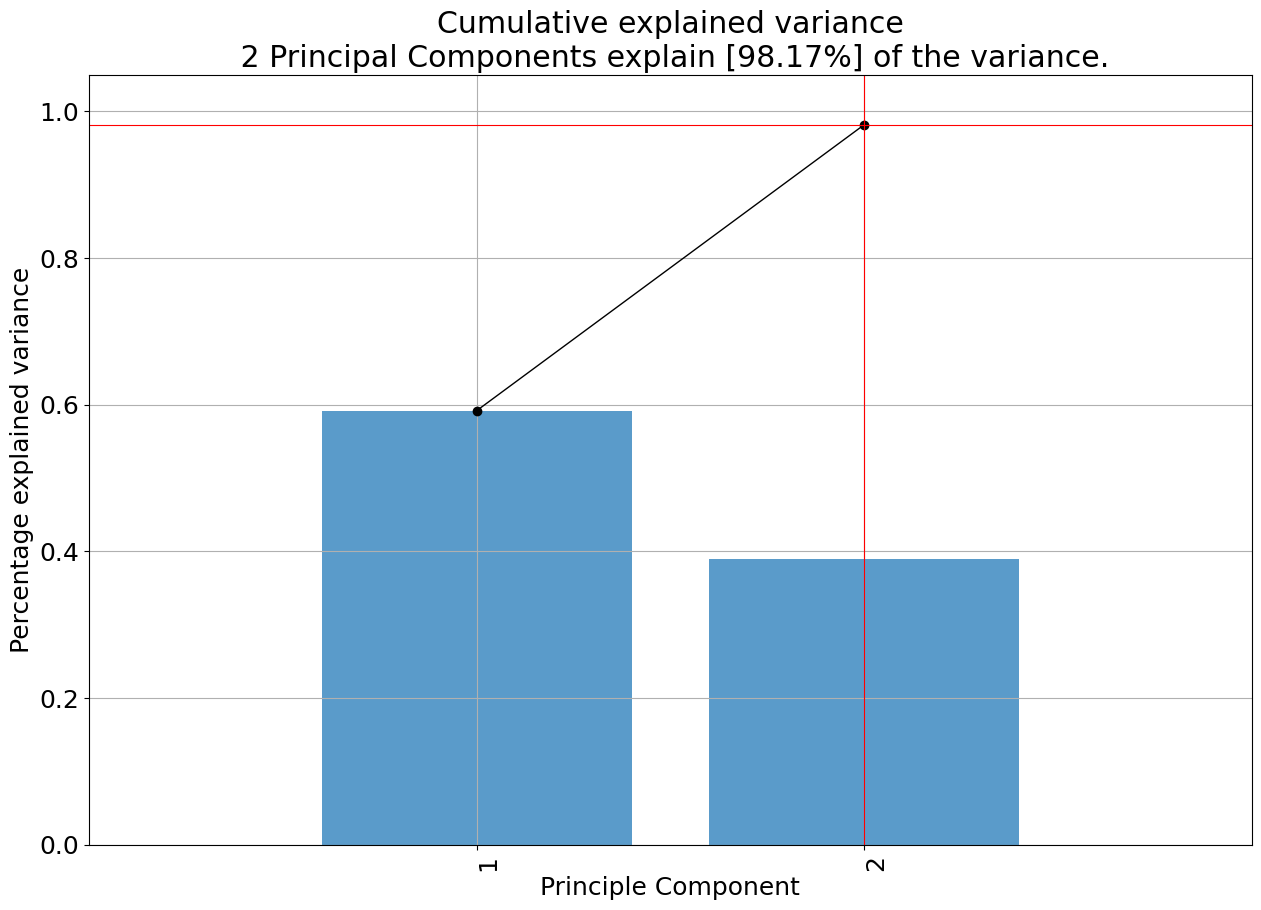

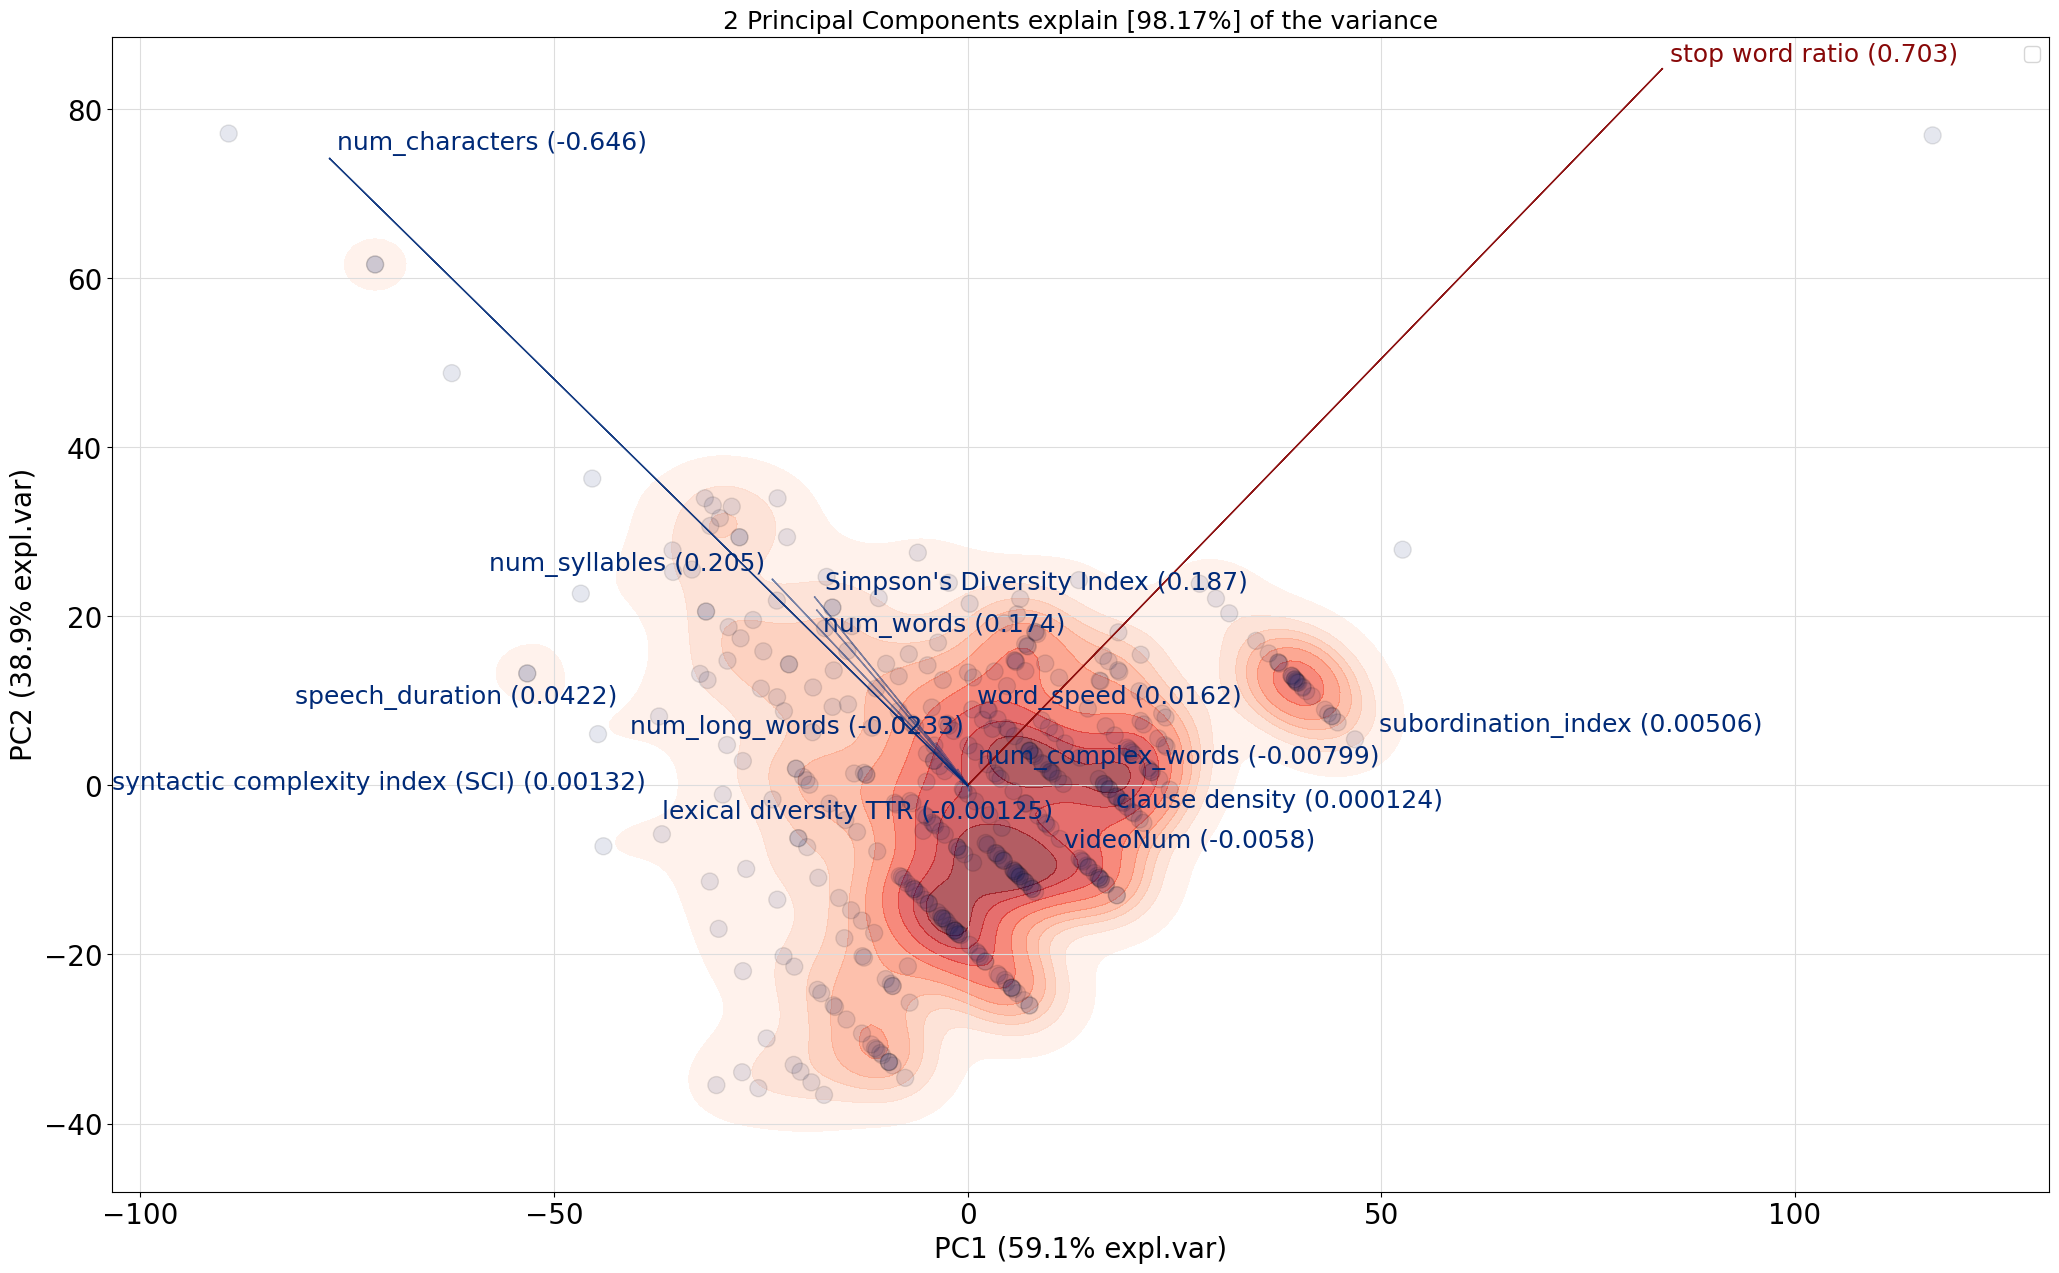

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string


is rta True is_distraction True
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


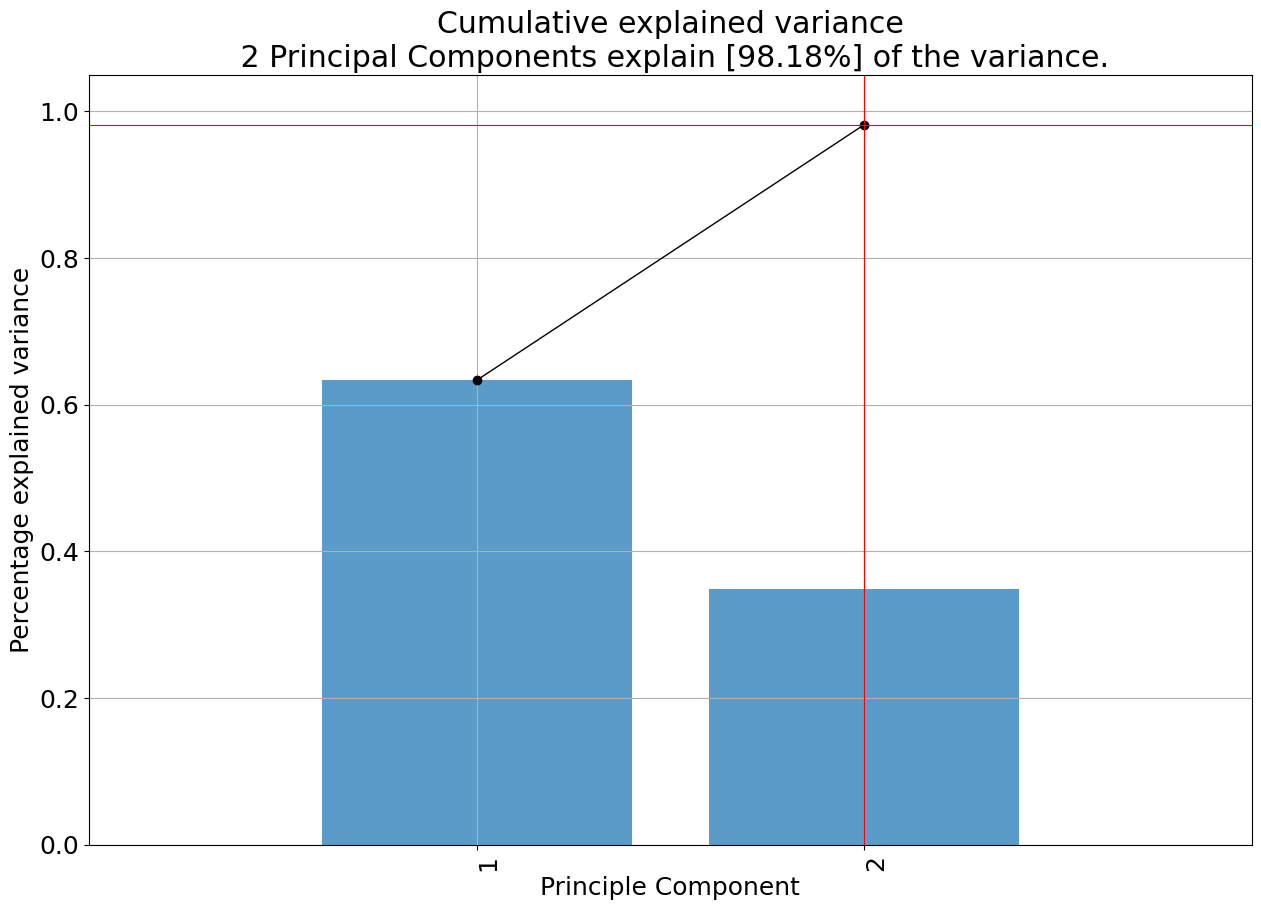

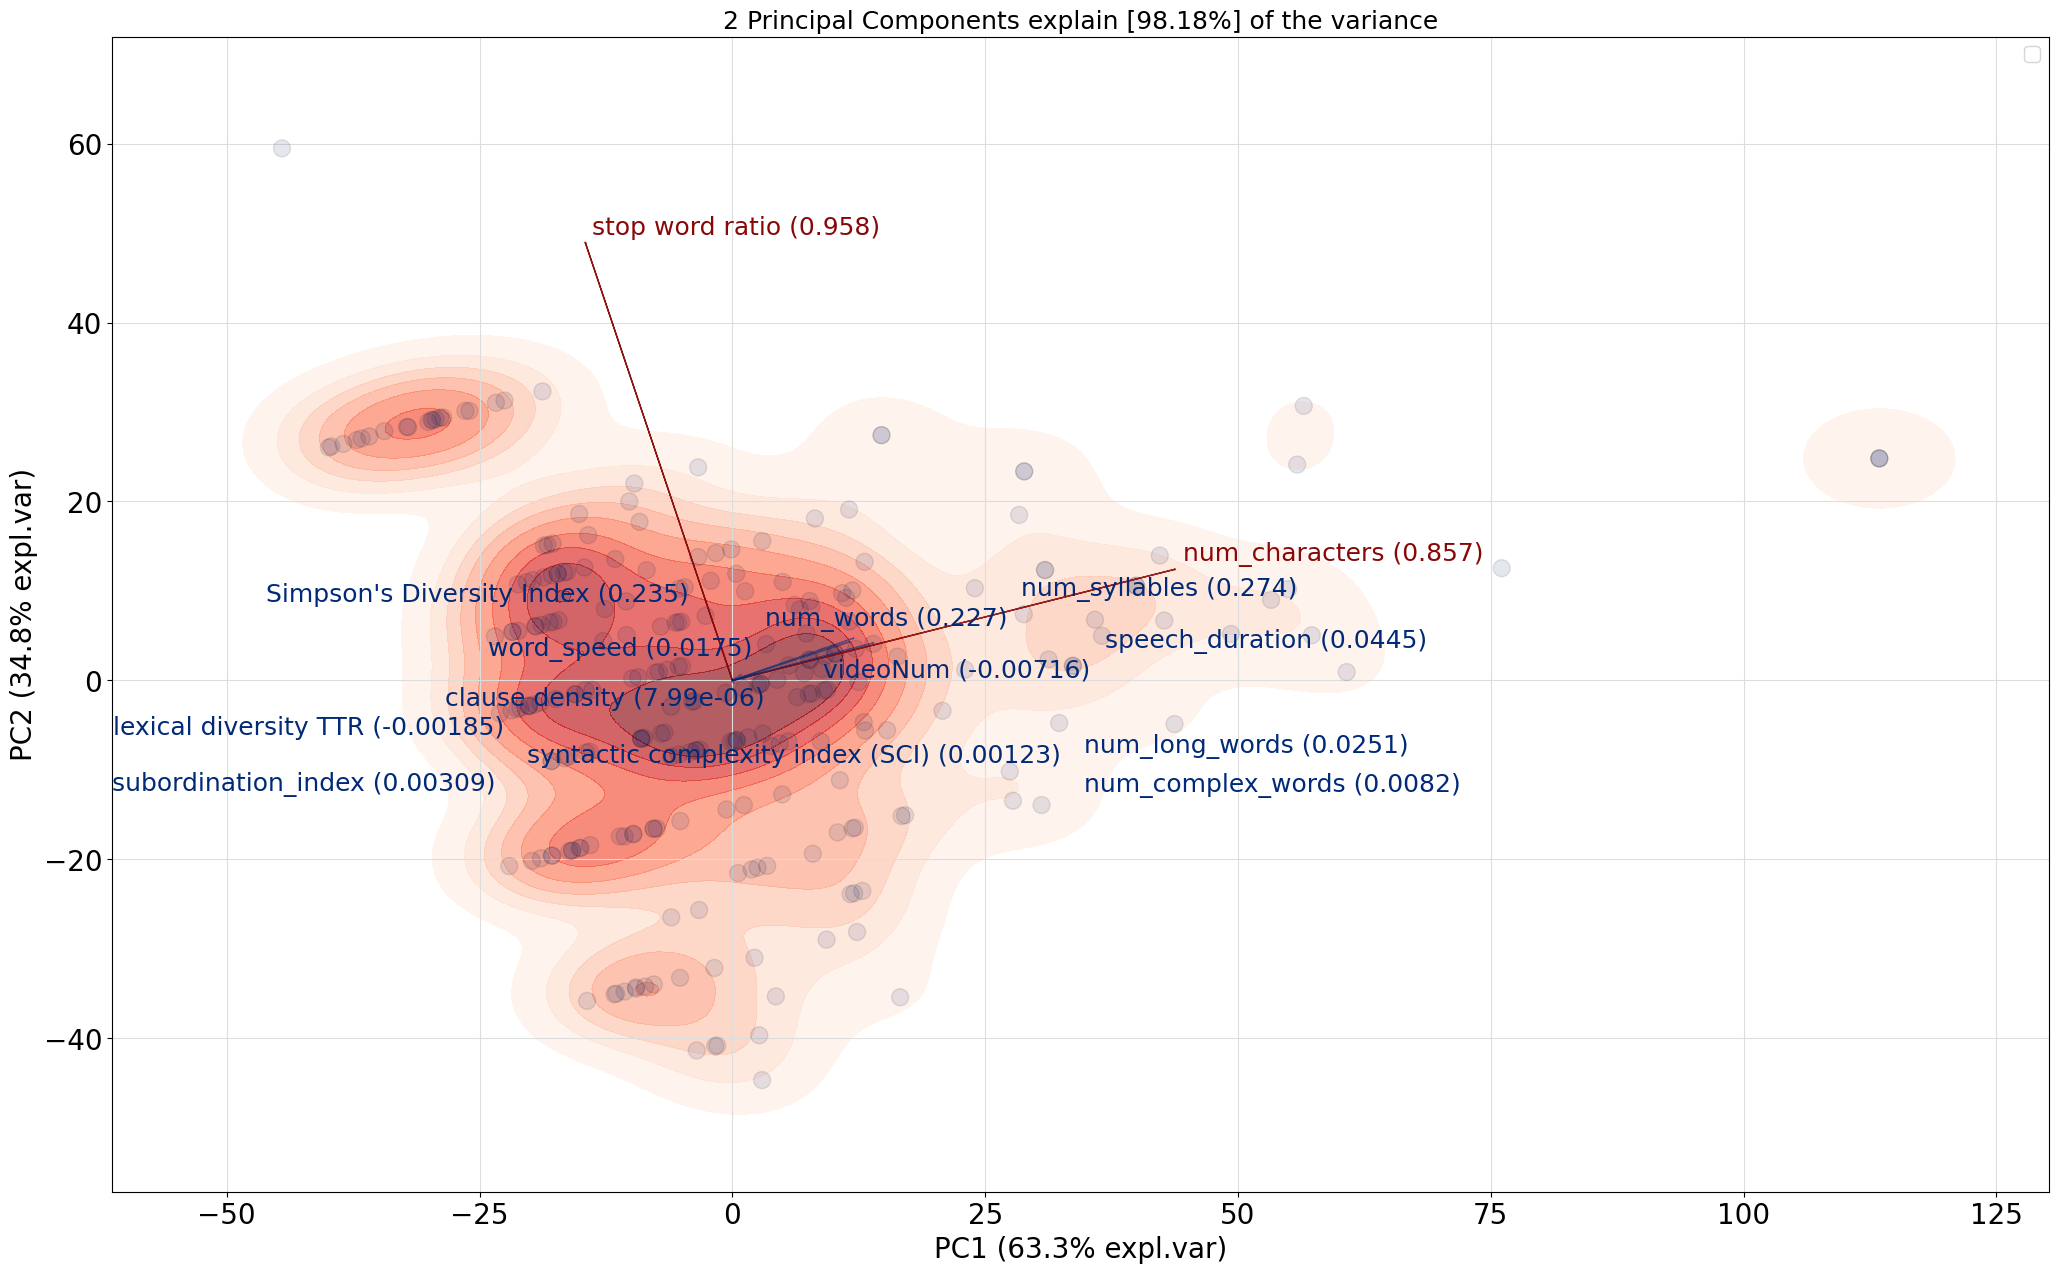

In [ ]:
# model = pca(n_components=0.95)
from pca import pca
# ... or explicitly specify the number of PCs
kkk = df_sentence_proc_1s
# ddd = df_sentence_proc_2s.drop(['p', 'duration','time', 'sentence'], axis=1).copy()
# ddd = kkk.drop(['p', 'duration','time', 'sentence', 'clause density', 'lexical diversity TTR', 'stop word ratio', 'is_distraction', 'is_rta'], axis=1).copy()
for i in kkk['is_rta'].unique():
  for j in kkk['is_distraction'].unique():
    print('is rta',i, 'is_distraction', j)
    ddd = kkk[(kkk['is_rta'] == i) & (kkk['is_distraction']==j)]
    ddd = ddd.drop(['p', 'duration','time', 'sentence', 'is_distraction', 'is_rta'], axis=1).copy()
    model = pca(n_components=2)

    # Fit and transform
    results = model.fit_transform(ddd)

    # Plot the explained variance
    fig, ax = model.plot()

    # # Scatter the first two PCs
    # fig, ax = model.scatter(density=True)

    # model.scatter(gradient='#FFFFFF', edgecolor=None)

    # Create a biplot
    fig, ax = model.biplot(alpha=0.1, density=True,gradient='#FFFFFF')
    plt.show()

<ipython-input-168-f546912d3a89>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_sentence_proc_f.drop(['p','sentence'], axis=1).corr(), dtype=np.bool))
<ipython-input-168-f546912d3a89>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_sentence_proc_f.drop(['p','sentence'], axis=1).corr(), dtype=np.bool))
<ipython-input-168-f546912d3a89>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future v

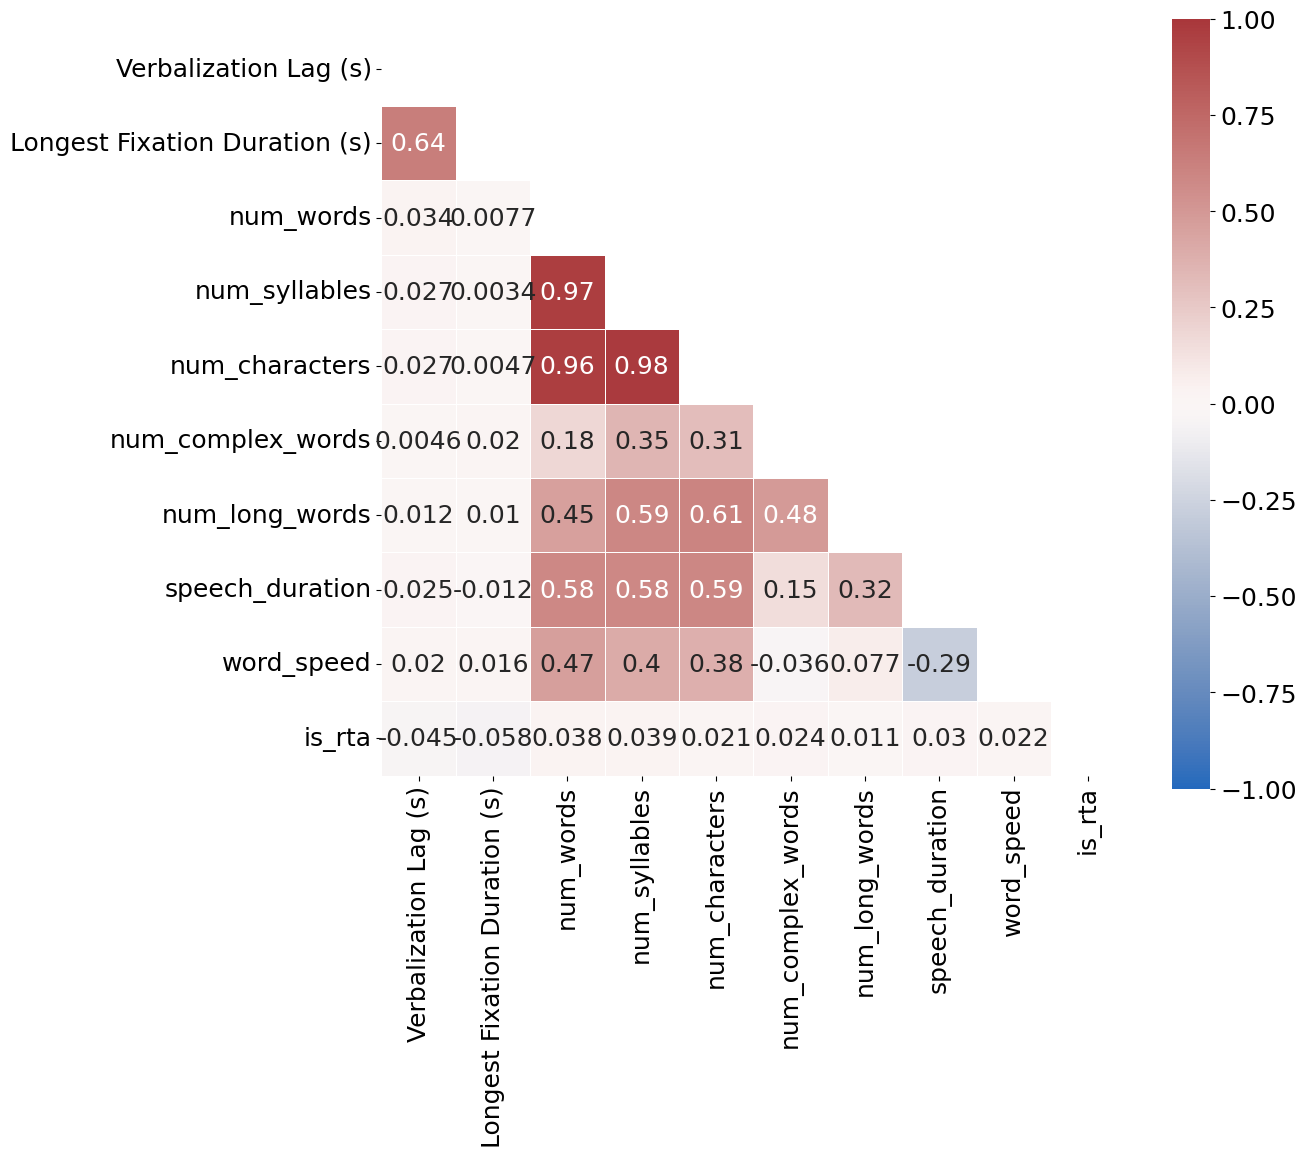

<ipython-input-168-f546912d3a89>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_sentence_proc_f.drop(drp_col, axis=1).groupby('p').mean().corr(), dtype=np.bool))


<Axes: >

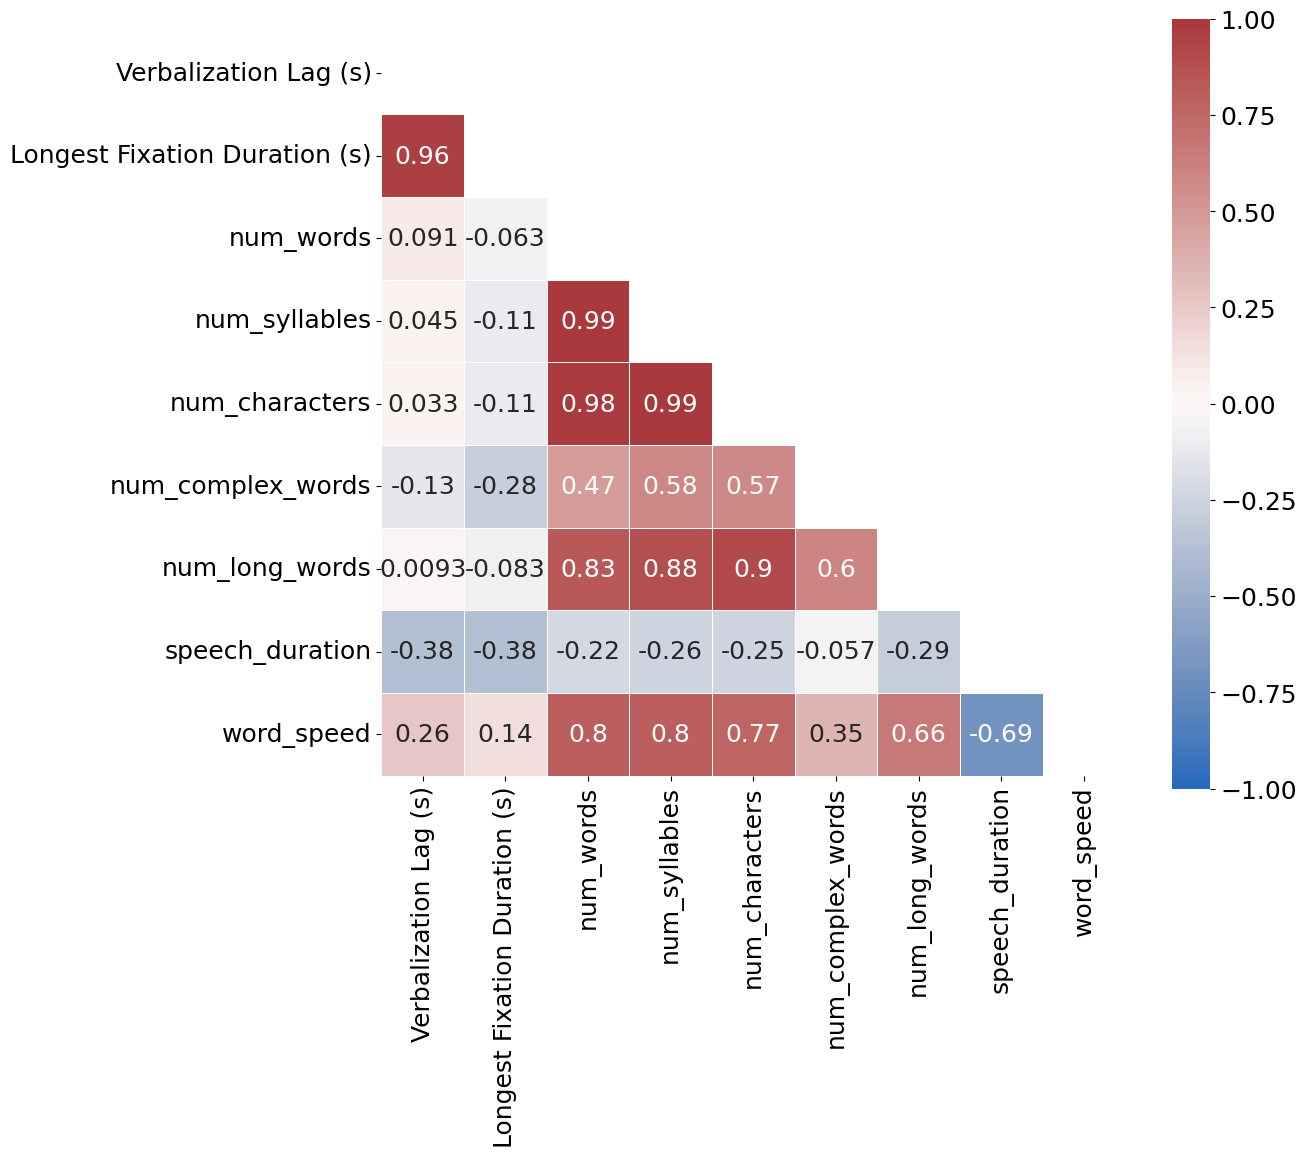

In [ ]:
# df_sentence_proc['Avg Syllables'] = df_sentence_proc['num_syllables']/df_sentence_proc['num_words']
# df_sentence_proc['Avg Characters'] = df_sentence_proc['num_characters']/df_sentence_proc['num_words']
# df_sentence_proc['Avg Complex Words'] = df_sentence_proc['num_complex_words']/df_sentence_proc['num_words']
# df_sentence_proc['Avg Long Words'] = df_sentence_proc['num_long_words']/df_sentence_proc['num_words']

df_proc = df_sentence_proc_1s

# df_sentence_proc_f = df_proc[df_proc['stop word ratio']<100].copy()
df_sentence_proc_f = df_proc.copy()
# for cc in ['num_words']:
#   q_low = df_proc[cc].quantile(0.01)
#   q_hi  = df_proc[cc].quantile(0.99)
#   df_sentence_proc_f = df_sentence_proc_f[(df_sentence_proc_f[cc] < q_hi) & (df_sentence_proc_f[cc] > q_low)]

mask = np.triu(np.ones_like(df_sentence_proc_f.drop(['p','sentence'], axis=1).corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12,10))
sns.heatmap(df_sentence_proc_f.drop(['p','sentence'], axis=1).rename(columns={'time':'Verbalization Lag (s)','duration':'Longest Fixation Duration (s)'}).corr(),annot=True, mask=mask, cmap=sns.color_palette("vlag", as_cmap=True),square=True, linewidths=.5, vmin=-1, vmax=1) # Width of lines that divide cells)
plt.show()
# drp_col = ['sentence', 'clause density', 'lexical diversity TTR', 'stop word ratio']
drp_col = ['sentence', 'is_rta', 'is_distraction']

mask = np.triu(np.ones_like(df_sentence_proc_f.drop(drp_col, axis=1).groupby('p').mean().corr(), dtype=np.bool))
cmap = sns.color_palette("vlag", as_cmap=True)
plt.figure(figsize=(12,10))
sns.heatmap(df_sentence_proc_f.drop(drp_col, axis=1).groupby('p').mean().rename(columns={'time':'Verbalization Lag (s)','duration':'Longest Fixation Duration (s)'}).corr(),annot=True, mask=mask, cmap=cmap,square=True, linewidths=.5, vmin=-1, vmax=1) # Width of lines that divide cells)

Window 0.5
{'polynomial': [1.257554737276522, -0.1516666928954865], 'determination': 0.7601374218376519}
Window 1
{'polynomial': [1.7886146482906589, -0.7773187385199697], 'determination': 0.9035443698613388}
Window 2
{'polynomial': [1.5929984551274632, -1.3397558748840583], 'determination': 0.8297188487440624}
Window 3
{'polynomial': [1.7767182614528254, -2.5059054013203936], 'determination': 0.7436965026979082}
Window 4
{'polynomial': [1.3523013158563892, -2.2204716261233535], 'determination': 0.6542324531061493}


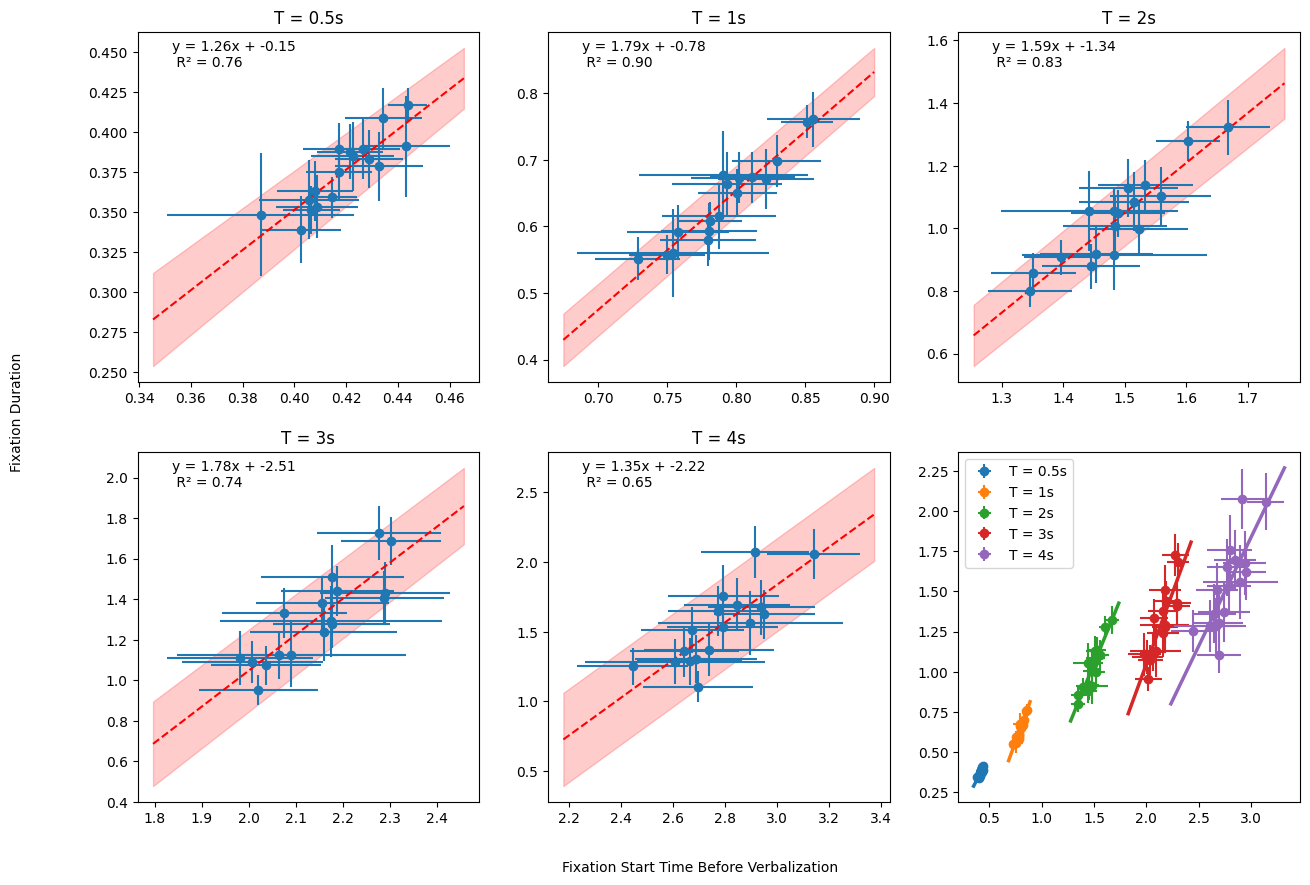

In [ ]:
import statsmodels.formula.api as sm
def plot_together(dfs):
  n = len(dfs)
  w = int(np.ceil(n/2))
  fig, ax = plt.subplots(2, w, figsize=(15, 10))
  i = 0
  for (df, window_size, df_w) in dfs:
    # print((i//w,i%w))
    ax[i//w,i%w].errorbar(df[('time','mean')].values, df[('duration','mean')].values,
                xerr=1.96*df[('time','std')].values/np.sqrt(df[('time','count')].values),
                yerr=1.96*df[('duration', 'std')].values/np.sqrt(df[('duration','count')].values),
                fmt='o')
    # ax.set_xlabel('Gaze Start Time Before Verbalization')
    # ax.set_ylabel('Gaze Duration')
    ax[i//w,i%w].set_title('T = '+str(window_size)+'s')

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[('time','mean')].values, df[('duration','mean')].values)

    # Compute the prediction interval
    x_vals = np.array(ax[i//w,i%w].get_xlim())
    y_vals = intercept + slope * x_vals
    t_val = scipy.stats.t.ppf(1-0.05/2, df=len(df[('time','mean')].values)-2)  # t-critical value for 95% CI
    sum_sq_dev = np.sum((df[('time','mean')].values - np.mean(df[('time','mean')].values))**2)
    MSE = np.sum((df[('duration','mean')].values - (intercept + slope * df[('time','mean')].values))**2) / (len(df[('time','mean')].values) - 2)
    ci = t_val * np.sqrt(MSE * (1/len(df[('time','mean')].values) + (x_vals - np.mean(df[('time','mean')].values))**2 / sum_sq_dev))

    # Plot the regression line and its prediction interval
    ax[i//w,i%w].plot(x_vals, y_vals, '--', color='red')
    ax[i//w,i%w].fill_between(x_vals, y_vals - ci, y_vals + ci, color='red', alpha=0.2)

    # Annotate the regression line equation
    r_sq = r_value ** 2
    ax[i//w,i%w].text(0.1, 0.9, f'y = {slope:.2f}x + {intercept:.2f}\n R² = {r_sq:.2f}', transform=ax[i//w,i%w].transAxes)

    i+=1

    g = ax[1,2].errorbar(df[('time','mean')].values, df[('duration','mean')].values,
                xerr=1.96*df[('time','std')].values/np.sqrt(df[('time','count')].values),
                yerr=1.96*df[('duration', 'std')].values/np.sqrt(df[('duration','count')].values),
                fmt='o', label='T = '+str(window_size)+'s')
    x = df[('time','mean')].values
    y = df[('duration','mean')].values
    xseq = np.linspace(min(df[('time','mean')].values-1.96*df[('time','std')].values/np.sqrt(df[('time','count')].values)), max(df[('time','mean')].values+1.96*df[('time','std')].values/np.sqrt(df[('time','count')].values)), num=100)
    coeffs  = np.polyfit(x, y, deg=1)
    b, a = coeffs
    results = {}
    results['polynomial'] = [b,a]

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    ax[1,2].plot(xseq, a + b * xseq, color=g[0].get_color(), lw=2.5);
    ax[1,2].legend()

    # if i!=5:
    #   x = df_w['time'].values
    #   y = df_w['duration'].values
    #   g = ax[1,2].scatter(x, y)

    #   xseq = np.linspace(min(x), max(x), num=100)
    #   b, a = np.polyfit(x, y, deg=1)

    #   ax[1,2].plot(xseq, a + b * xseq, lw=2.5)
    print('Window', window_size)
    print(results)

  fig.text(0.5, 0.04, 'Fixation Start Time Before Verbalization', ha='center')
  fig.text(0.04, 0.5, 'Fixation Duration', va='center', rotation='vertical')
  plt.show()

plot_together([gaze_sentence_05s, gaze_sentence_1s, gaze_sentence_2s, gaze_sentence_3s, gaze_sentence_4s])